# Mi sueldo y yo: Descubriendo los factores personales que afectan al salario

**Objetivo**: El objetivo de este EDA es explorar la relación entre el salario mensual y las características personales de los trabajadores de una empresa ficticia.

Para explorar dichos factores, **asumiré una serie de relaciones** entre la variable objetivo (el salario mensual) y las variables explicativas:

- **Hipótesis 1**: "El nivel de educación, los años de experiencia y el nivel de compromiso influyen en el salario mensual (existe una relación positiva)."
- **Hipótesis 2**: "El área de especialización tiene un impacto en el salario- El departamento en el que el empleado trabaja dentro de la empresa y su área de estudios influye en su salario mensual."
- **Hipótesis 3**:"La vida personal puede tener un impacto en el salario- El grado de satisfacción dentro de una relación sentimental, el estado matrimonial y la percepción del equilibrio entre la vida personal y laboral puede influir en el salario mensual."
- **Hipótesis 4**:"Factores exógenos- Factores incontrolables como el sexo y la edad pueden tener un impacto en el salario."

Al final del EDA comprobaré si dichas relaciones se cumplen.

### DATASET

- El dataset original tiene 1470 filas y 35 columnas
- Tras eliminar las columnas redundantes quedan 22 columnas
- No hay 'missing values'
- 15 variables son enteros y 7 son objetos.
- Las variables 'objetos' son variables categóricas nominales
- Dentro de las variables numericas hay variables categóricas ordinales que toman los siguientes valores:
    - Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'
    - EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'
    - RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best

In [583]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\rafam\OneDrive\Documentos\GitHub\mi_copia_dsftmayo24semana1.1\semana 2 y 3\1_Data_Analysis\Entregas\EDA\WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt', delimiter='\t')
df
df1 = pd.DataFrame(df)
fuente_1 = "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset"

In [584]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [585]:
df1.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [586]:
df1.shape

(1470, 35)

In [587]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Elimino las columnas redundantes, de difícil interpretabilidad o ajenas a nuestro análisis 

In [588]:
df1['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [589]:
df1['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [590]:
df1['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

Variables como 'BusinessTravel', 'Distance from Home' y 'Daily Rate' son difíciles de interpretar en el contexto de mi análisis. Otras variables como 'Hourly rate' y 'Attrition' no me interesan, ya que me centro en encontrar información sobre el salario mensual, no sobre el salario hora, el abandono laboral u otras formas de retribución no salariales.  

In [591]:
columnas_redundantes= ['EmployeeCount', 'Over18', 'DailyRate', 'StandardHours', 'JobLevel', 'EmployeeNumber', 'MonthlyRate', 'BusinessTravel', 'DistanceFromHome', 'StockOptionLevel', 'Attrition', 'HourlyRate', 'YearsWithCurrManager']

In [592]:
df1= df1.drop(columnas_redundantes, axis= 1)

In [593]:
df1.dtypes

Age                          int64
Department                  object
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
dtype: object

In [594]:
df1.dtypes.value_counts()

int64     16
object     6
Name: count, dtype: int64

In [595]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Department                1470 non-null   object
 2   Education                 1470 non-null   int64 
 3   EducationField            1470 non-null   object
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   Gender                    1470 non-null   object
 6   JobInvolvement            1470 non-null   int64 
 7   JobRole                   1470 non-null   object
 8   JobSatisfaction           1470 non-null   int64 
 9   MaritalStatus             1470 non-null   object
 10  MonthlyIncome             1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  OverTime                  1470 non-null   object
 13  PercentSalaryHike         1470 non-null   int64 
 14  PerformanceRating       

In [596]:
df1.isnull().sum().sum()

0

In [597]:
df1.duplicated().sum()

0

In [598]:
df1.describe()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,2.729932,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755
std,9.135373,1.024165,1.093082,0.711561,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,3.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,43.000000,4.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000
max,60.000000,5.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000


In [599]:
df1.iloc[:, :16].describe()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,2.729932,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245
std,9.135373,1.024165,1.093082,0.711561,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000
50%,36.000000,3.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000
75%,43.000000,4.000000,4.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000
max,60.000000,5.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000


- Variable objetivo:
    - La salario mensual medio es de 6.500$. El salario mensual mediano (50% de las observaciones) es de 4.920$. El salario mensual mínimo es de 1.010$ al mes y el máximo de 20.000 $. Parece que la distribución tiene una asimetría positiva.

- Variables explicativas:
    - La edad media es 37 años. El mínimo es 18 años y el máximo es 60 años. Parece que tiene un distribución simétrica.
    - Los empleados de la compañía han trabajado en media para 2,7 empresas distintas. El 50% de los empleados ha trabajado en 2 empresas o menos. El empleado que ha trabajado en más empresas lo ha hecho en 9.
    - La valoración media del desempeño de los empleados es de 3, que equivale a 'excelente'. 
    - La variables YearsInCurrentRole y YearsWithCurrManager son prácticamente idénticas. Eliminaré una de ellas ya que incluir ambas parace redundante.

In [600]:
df1.iloc[:, 16:].describe()

,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755
std,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000
75%,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000
max,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000


- Variables explicativas:
    - La satisfacción media de los empleados con sus relaciones personales es 2.7. Es decir, está entre 'normal' y 'alta'. Más del 50% de los empleados tiene una satisfacción alta con sus relaciones personales.
    - La experiencia laboral media de los empleados de la empresa es de 11,3 años. El mínimo es 0 años y el máximo es 40 años. El 50% de los empleados de la empresa tiene experiencia laboral inferior o igual a 10 años y el 75% ha trabajado durante al menos a 15 años. Parece que la variable tiene una distribución con asimetría positiva. 
    - De media, los trabajadores han tenido 3 formaciones en el último año.
    - De media, los trabajadores consideran que tienen un equilibrio entre la vida profesional y laboral entre bueno (equivalente a 2) y muy bueno (equivalente a 3).
    - De media, los empleados han estado 7 años trabajando en la empresa. El 50% de los trabajadores lleva al menos 5 años en la compañía, y el empleado que más tiempo lleva en la empresa lleva 40 años. 
    - De media, los empleados ascienden dentro de la empresa en 2,2 años. El 50% de los empleados ha sido promocionado hace un año o menos y el trabajador que más tiempo lleva sin ascender lo hizo hace 15 años. 

In [601]:
df1['NumCompaniesWorked']= df1['NumCompaniesWorked'].replace([4, 5, 6, 7, 8, 9], ['>3', '>3', '>3', '>3', '>3', '>3'])

### ANÁLISIS UNIVARIANTE

#### VARIABLES CATEGÓRICAS NOMINALES

- Hay 7 columnas objeto.
- Hay 3 departamento principales, el 95% trabaja en ventas o en investigación. El resto trabaja en RRHH.
- Mas del 70% de la empresa ha estudiado biología o medicina.
- El 60% de los empleados son hombres y el 40% restante mujeres.
- El 32% de los empleados están solteros, el 22% divorciados y el 46% casados. 

In [602]:
df1.dtypes[df1.dtypes == "object"]

Department            object
EducationField        object
Gender                object
JobRole               object
MaritalStatus         object
NumCompaniesWorked    object
OverTime              object
dtype: object

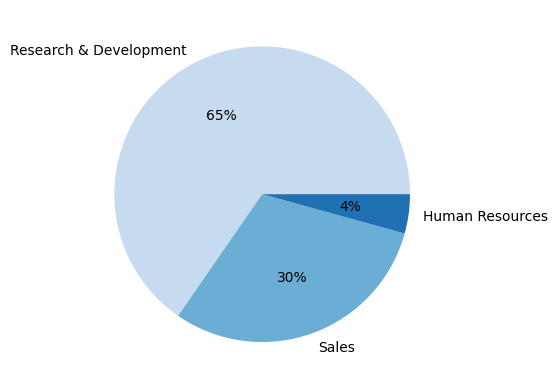

In [603]:
data2 = df1["Department"].value_counts()

colors1 = sns.color_palette('Blues', len(data2))
 
plt.pie(data2.values,
        labels=data2.index,
        autopct='%1.0f%%',
        colors=colors1)
p=plt.gcf();

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3652702886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["EducationField"], palette='Blues');


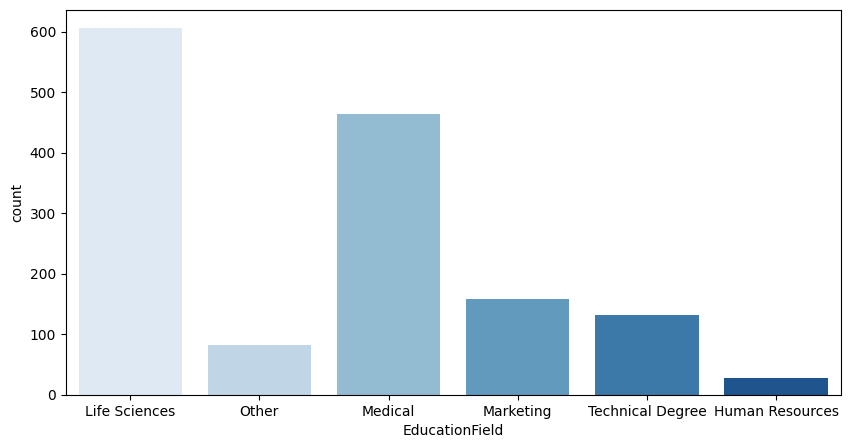

In [604]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["EducationField"], palette='Blues');

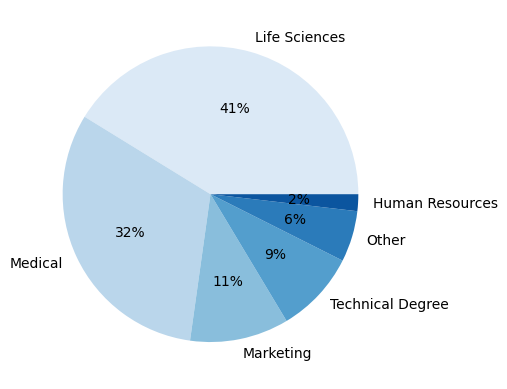

In [605]:
data21 = df1["EducationField"].value_counts()

colors21 = sns.color_palette('Blues', len(data21))
 
plt.pie(data21.values,
        labels=data21.index,
        autopct='%1.0f%%',
        colors=colors21)
p=plt.gcf();

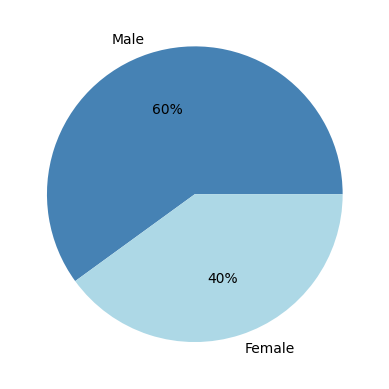

In [606]:
data5 = df1["Gender"].value_counts()
 
plt.pie(data5.values,
        labels=data5.index,
        autopct='%1.0f%%',
        colors=['steelblue', 'lightblue'])
p=plt.gcf();

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2675987667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart1= sns.countplot(x=df["JobRole"], palette='Blues');


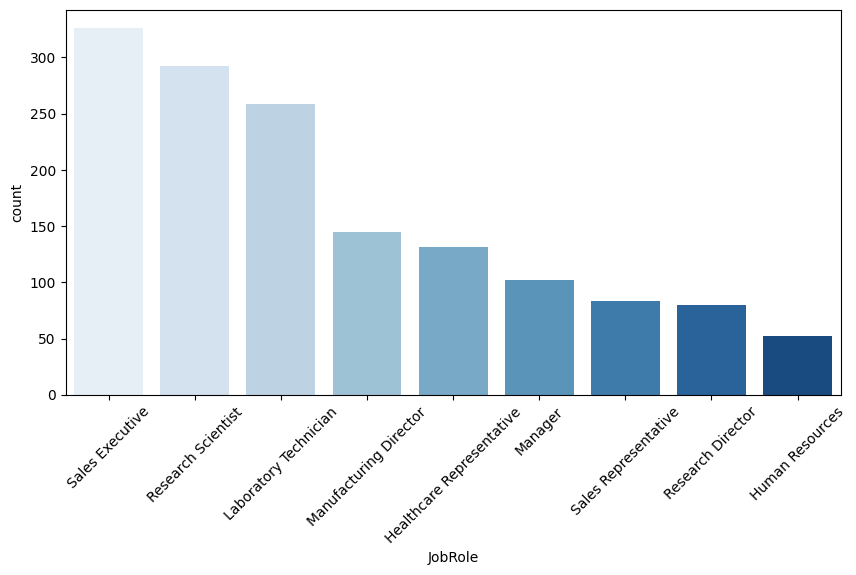

In [607]:
plt.figure(figsize=(10,5))
chart1= sns.countplot(x=df["JobRole"], palette='Blues');
plt.xticks(rotation = 45);

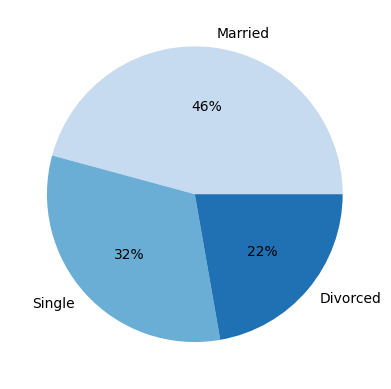

In [608]:
data1 = df1["MaritalStatus"].value_counts()

colors = sns.color_palette('Blues', len(data1))
 
plt.pie(data1.values,
        labels=data1.index,
        autopct='%1.0f%%',
        colors= colors)
p=plt.gcf();

#### VARIABLES CATEGÓRICAS ORDINALES

- El 69% de los empleados tiene formación universitaria y alrededor del 30% tiene un título superior al grado (máster o doctorado).
- Más del 60% de los empleados tiene una satisfacción alta o muy alta con el ambiente de trabajo, y el 19% tienen una satisfacción baja. 
- Alrededor del 70% de los trabajadores tiene un grado de compomiso alto o muy alto. Sólo un 6% de ellos tiene un compromiso bajo.  
- En el 85% de los casos, el desempeño de los empleados en excelente y en un es 15% excepcional (mejor que excelente).
- El 60% de los empleados tiene una satisfacción alta o muy alta con sus relaciones personales. El 19% tienen una satisfacción baja.
- El 95% de los trabajadores considera que su equilibrio entre el trabajo y su vida personal es bueno o muy bueno. Solo el 5% de los empleados está insatisfecho con este equilibrio. 


In [609]:
df2= df1.copy()

In [610]:
df2['Education']= df2['Education'].replace([1, 2, 3, 4, 5], ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])

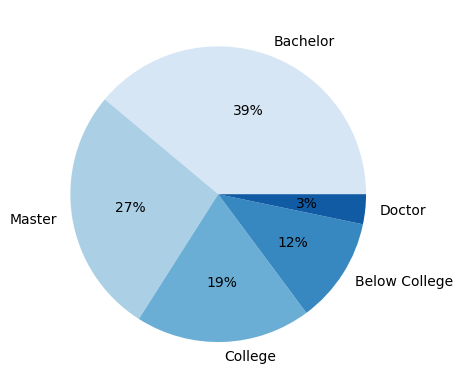

In [611]:
data6 = df2["Education"].value_counts()

colors = sns.color_palette('Blues', len(data6))
 
plt.pie(data6.values,
        labels=data6.index,
        autopct='%1.0f%%',
        colors= colors)
p=plt.gcf();

In [612]:
df2['EnvironmentSatisfaction']= df2['EnvironmentSatisfaction'].replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'])

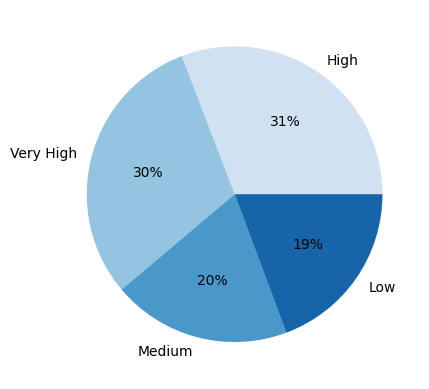

In [613]:
data7 = df2["EnvironmentSatisfaction"].value_counts()

colors = sns.color_palette('Blues', len(data7))
 
plt.pie(data7.values,
        labels=data7.index,
        autopct='%1.0f%%',
        colors= colors)
p=plt.gcf();

In [614]:
df2['JobInvolvement']= df2['JobInvolvement'].replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'])

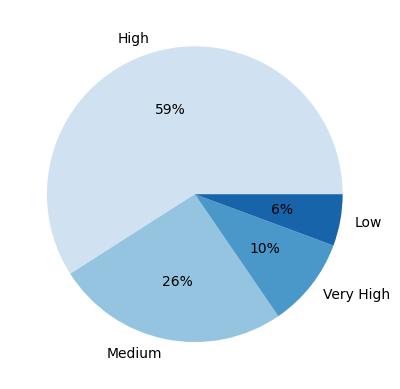

In [615]:
data8 = df2["JobInvolvement"].value_counts()

colors23 = sns.color_palette('Blues', len(data8))
 
plt.pie(data8.values,
        labels=data8.index,
        autopct='%1.0f%%',
        colors= colors23)
p=plt.gcf();

In [616]:
df2['JobSatisfaction']= df2['JobSatisfaction'].replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'])

In [617]:
df2['PerformanceRating']= df2['PerformanceRating'].replace([1, 2, 3, 4], ['Low', 'Good', 'Excellent', 'Outstanding'])

In [618]:
df2['RelationshipSatisfaction']= df2['RelationshipSatisfaction'].replace([1, 2, 3, 4], ['Low', 'Medium', 'High', 'Very High'])

In [619]:
df2['WorkLifeBalance']= df2['WorkLifeBalance'].replace([1, 2, 3, 4], ['Bad', 'Good', 'Better', 'Best']) 

Text(0.5, 1.0, 'WorkLifeBalance')

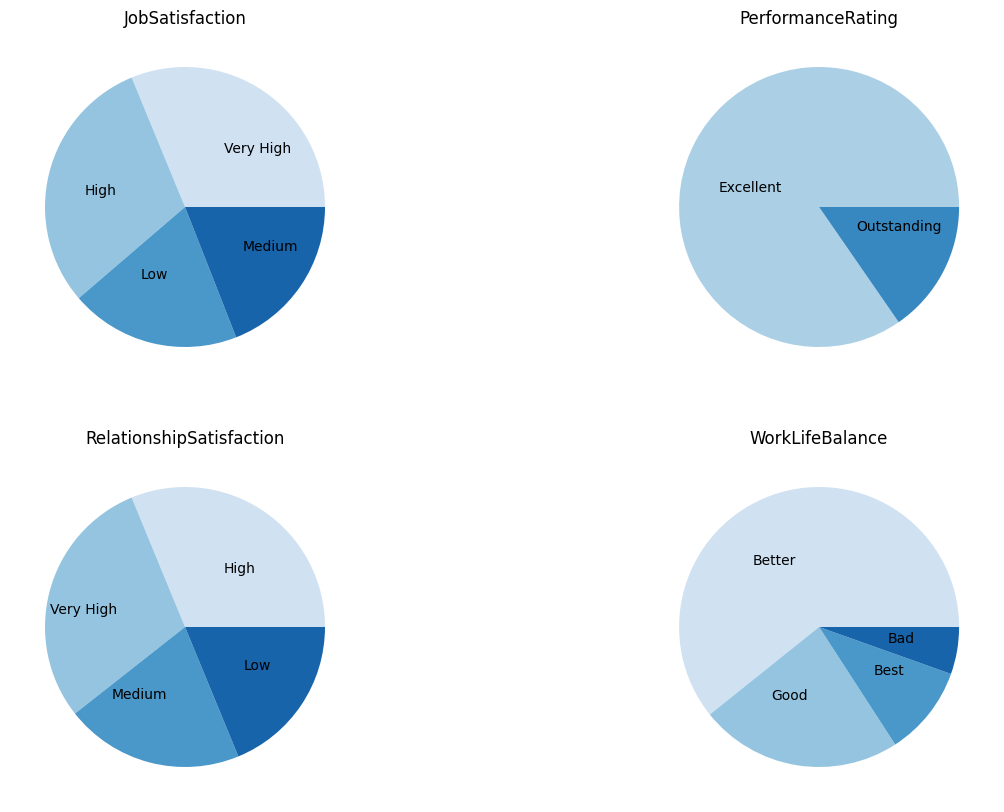

In [620]:
data9 = df2["JobSatisfaction"].value_counts()
data10 = df2["PerformanceRating"].value_counts()
data11 = df2["RelationshipSatisfaction"].value_counts()
data12 = df2["WorkLifeBalance"].value_counts()

f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True)

colors0_0 = sns.color_palette('Blues', len(data9))
colors0_1 = sns.color_palette('Blues', len(data10))
colors1_0 = sns.color_palette('Blues', len(data11))
colors1_1 = sns.color_palette('Blues', len(data12))



axes[0, 0].pie(data9.values,
               labels=data9.index,
               colors=colors0_0,
               labeldistance=0.5,
               pctdistance=0.3)
axes[0, 0].set_title('JobSatisfaction')

axes[0, 1].pie(data10.values,
               labels=data10.index,
               colors= colors0_1,
               labeldistance=0.3)
axes[0, 1].set_title('PerformanceRating')

axes[1, 0].pie(data11.values,
               labels=data11.index,
               colors= colors1_0,
               labeldistance=0.5)
axes[1, 0].set_title('RelationshipSatisfaction')

axes[1, 1].pie(data12.values,
               labels=data12.index,
               colors= colors1_1,
               labeldistance=0.5)
axes[1, 1].set_title('WorkLifeBalance')

#### VARIABLES NUMÉRICAS

- La distribución de la variable objetivo salario mensual tiene una asimetría positiva. Eso significa que unos pocos empleados con un salario alto distorsionan la media. Así, más del 50% de los empleados ganan por debajo de la media.
- La variable edad tiene una distribución de campana simétrica.
- El numero de años trabajados totales y el número de años trabajados en la compañía tienen un distribución similar. Ambas tienen asimetría positiva.
- El numero de años desde el último ascenso y el número de años dentro del mismo puesto de trabajo tienen un distribución similar. Ambas tienen una distribución leptocúrtica y asimetría positiva.

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1907048128.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["MonthlyIncome"],


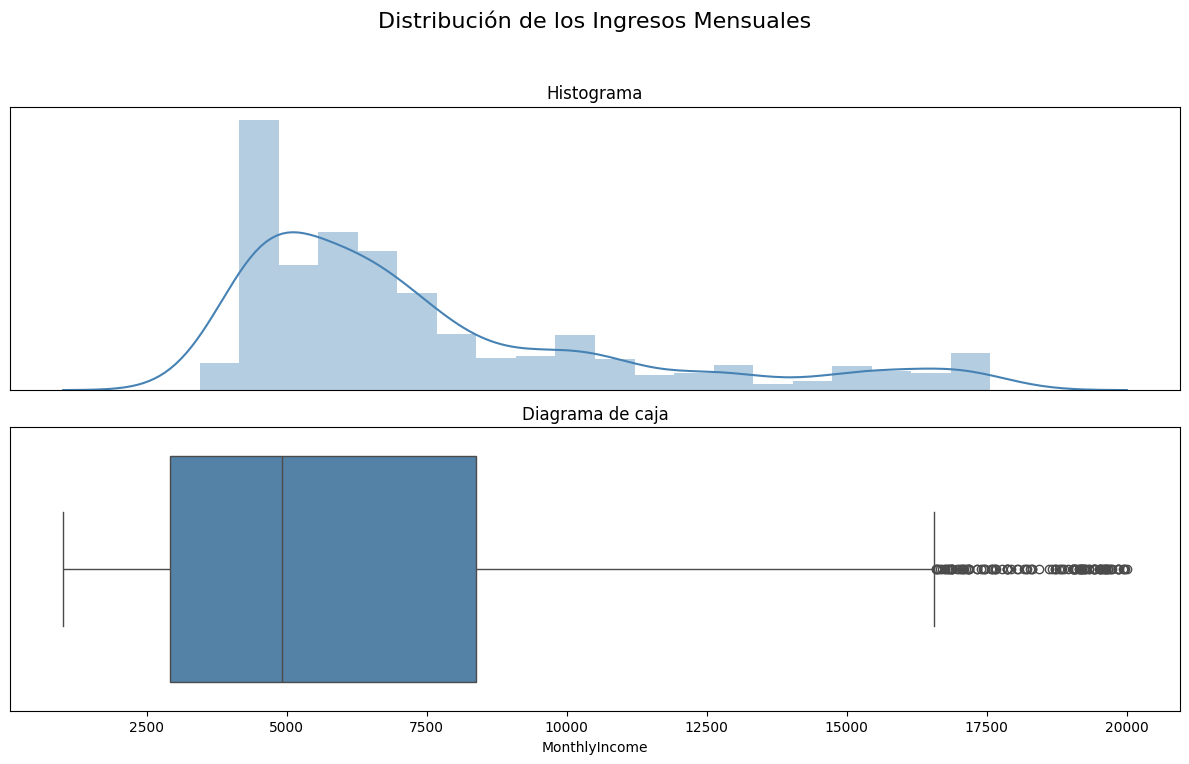

In [621]:
f, axes = plt.subplots(2, 1, figsize=(12,8))
f.suptitle('Distribución de los Ingresos Mensuales', fontsize=16)

sns.distplot(df2["MonthlyIncome"],
             kde=True,
            bins=20,
            color='steelblue',
            ax=axes[0]);
axes[0].set_title('Histograma')
axes[0].yaxis.set_visible(False)
axes[0].xaxis.set_visible(False)

sns.boxplot(df2["MonthlyIncome"],
            color='steelblue',
            ax=axes[1],
            orient='h');

axes[1].set_title('Diagrama de caja')
axes[1].yaxis.set_visible(False)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [622]:
df2.dtypes[df2.dtypes == "int64"]

Age                        int64
MonthlyIncome              int64
PercentSalaryHike          int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
dtype: object

In [623]:
variables_exp=df2.copy()
hist= ['MonthlyIncome', 'PercentSalaryHike', 'TrainingTimesLastYear', 'NumCompaniesWorked']
variables_exp.drop(hist, axis= 1, inplace=True)

In [624]:
variables_exp.columns[variables_exp.dtypes == 'int64']

Index(['Age', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

<Axes: >

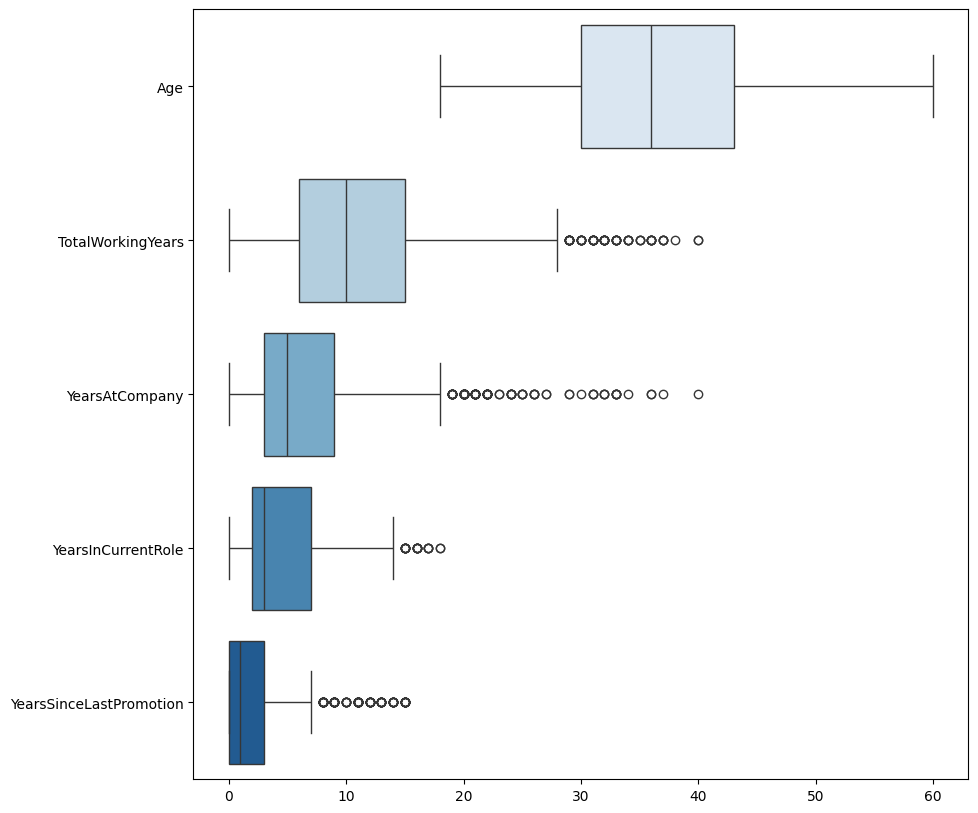

In [625]:
plt.figure(figsize=(10,10))
sns.boxplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[:]], orient='h', palette="Blues")

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2469342158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Age"],


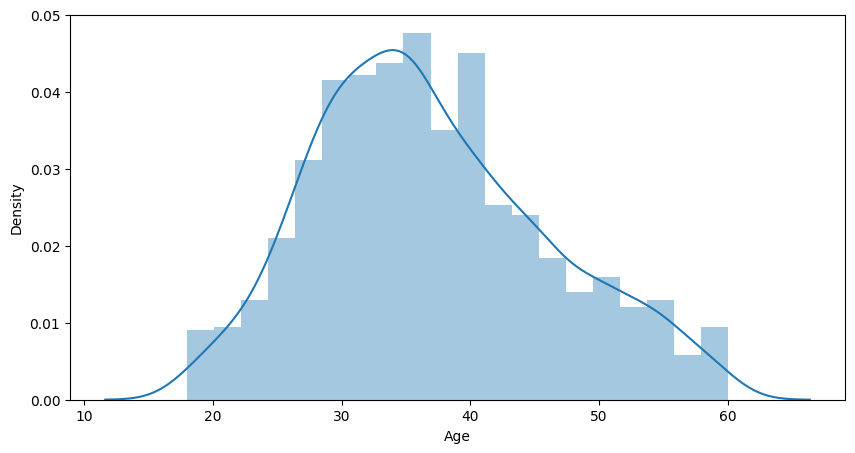

In [626]:
plt.figure(figsize=(10,5))
sns.distplot(df2["Age"],
             kde=True,
            bins=20);

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3950636318.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[1:3]], palette= 'Blues', shade=True, ax=axes[0])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3950636318.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[3:]], palette= 'Blues', shade=True, ax=axes[1])


<Axes: ylabel='Density'>

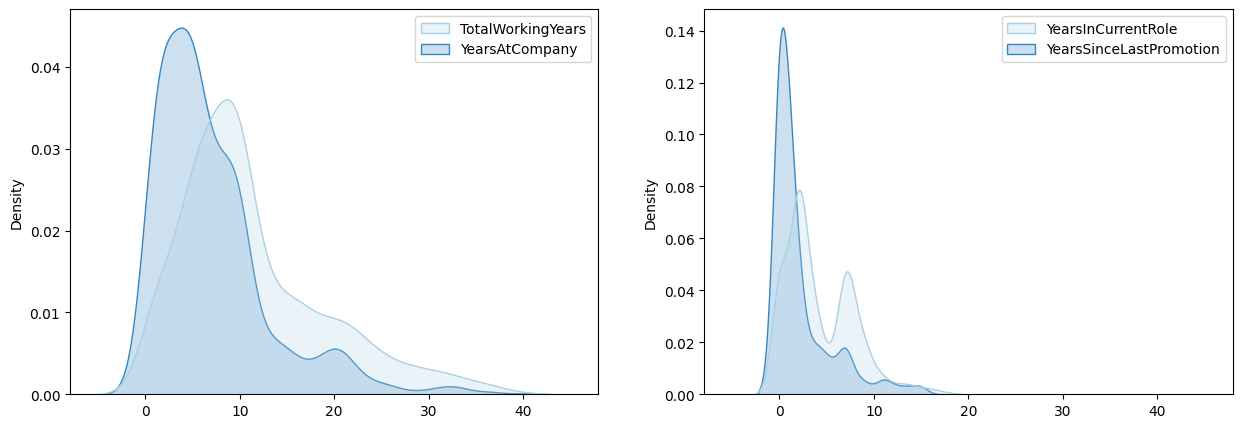

In [627]:
f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)
sns.kdeplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[1:3]], palette= 'Blues', shade=True, ax=axes[0])
sns.kdeplot(data=variables_exp[variables_exp.columns[variables_exp.dtypes == "int64"].values[3:]], palette= 'Blues', shade=True, ax=axes[1])

### ANALÍSIS BIVARIANTE

#### Variables Categóricas (Nominales)

- No se observan grandes diferencias en el salario mensual en función del departamento.
- No se observan grandes diferencias en el salario mensual en función del sexo.
- Parece haber una relación entre el estado matrimonial y el salario medio.
- Existe una diferencia notable en el salario mensual medio en función del puesto que ocupe cada empleado en la empresa. Estos puestos se pueden agrupar en empleados normales, gerentes de rango medio y gerentes de rango alto.

In [628]:
df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3610032312.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3610032312.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Department,,
Human Resources,6654.507937,3886.0
Research & Development,6281.252862,4374.0
Sales,6959.172646,5754.5


C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2070043355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="Department", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='Department', ylabel='MonthlyIncome'>

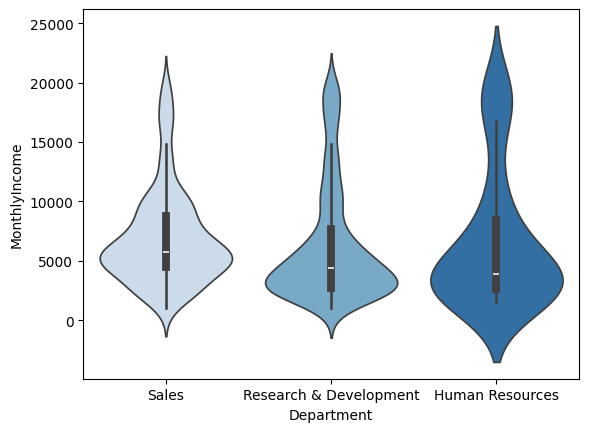

In [629]:
sns.violinplot(data=df1, x="Department", y="MonthlyIncome", palette= 'Blues')

In [630]:
df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1116162445.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1116162445.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Gender,,
Female,6686.566327,5081.5
Male,6380.507937,4837.5


In [631]:
df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\4177486508.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\4177486508.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
MaritalStatus,,
Divorced,6786.287462,5131.0
Married,6793.671620,5204.0
Single,5889.472340,4536.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1932262329.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="MaritalStatus", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='MaritalStatus', ylabel='MonthlyIncome'>

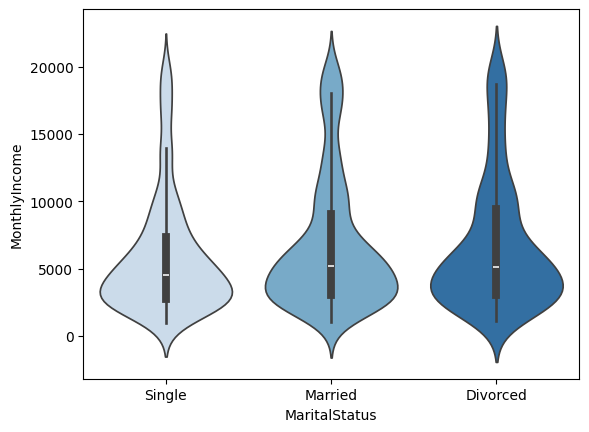

In [632]:
sns.violinplot(data=df1, x="MaritalStatus", y="MonthlyIncome", palette= 'Blues')

In [633]:
df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1323791143.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1323791143.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])


,mean,median
MaritalStatus,,
Divorced,37.489297,37.0
Married,37.757801,36.0
Single,35.336170,34.0


In [634]:
df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1251108155.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1251108155.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobRole,,
Healthcare Representative,7528.763359,6811.0
Human Resources,4235.750000,3093.0
Laboratory Technician,3237.169884,2886.0
Manager,17181.676471,17454.5
Manufacturing Director,7295.137931,6447.0
Research Director,16033.550000,16510.0
Research Scientist,3239.972603,2887.5
Sales Executive,6924.279141,6231.0
Sales Representative,2626.000000,2579.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\4066766151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="JobRole", y="MonthlyIncome", palette= 'Blues')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

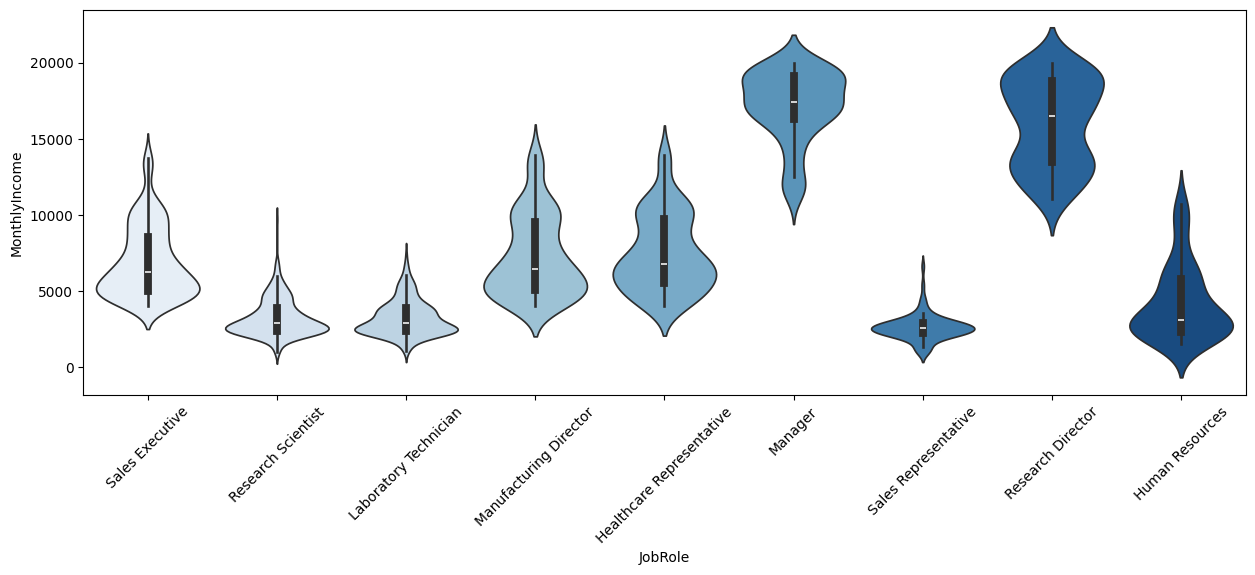

In [635]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df1, x="JobRole", y="MonthlyIncome", palette= 'Blues')
plt.xticks(rotation = 45)

In [636]:
df2['JobRole']= df1['JobRole'].replace(["Laboratory Technician", "Research Scientist", "Human Resources", "Sales Representative"], ["Regular Employee", "Regular Employee", "Regular Employee", "Regular Employee"])

In [637]:
df2['JobRole']= df2['JobRole'].replace(["Research Director", "Manager"], ["Senior Manager", "Senior Manager"]) 

In [638]:
df2['JobRole']= df2['JobRole'].replace(["Healthcare Representative", "Manufacturing Director", "Sales Executive"], ["Middle Management", "Middle Management", "Middle Management"])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\152954528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="JobRole", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='JobRole', ylabel='MonthlyIncome'>

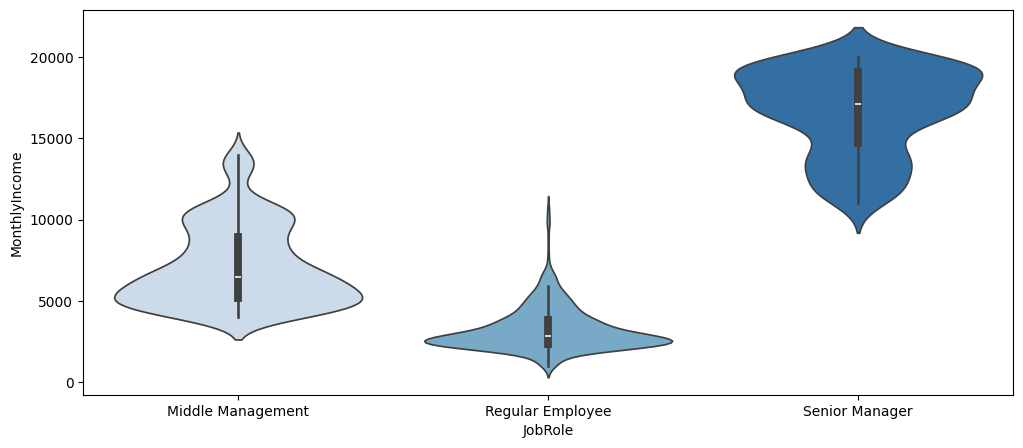

In [639]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df2, x="JobRole", y="MonthlyIncome", palette= 'Blues')

#### Variables Categóricas (Ordinales)

- Se observan diferencias en el salario mensual en función del nivel de formación del trabajador. A medida que aumenta el nivel de formación de cada grupo de empleados, aumenta el salario medio y mediano.
- No se observan grandes diferencias en el salario mensual en función del grado de compromiso de cada empleado. Tampoco en función del desempeño.
- Parece haber una pequeña diferencia entre los trabajadores con una satisfacción con sus relaciones baja y el resto de empleados. También se observa entre los empleados que consideran que el equilibrio entre su vida personal y profesional es malo y los demás.
- Hasta cierto punto, a medida que aumenta el número de empresas para las que ha trabajado cada empleado, aumenta el salario medio. A partir de 3 empresas esta relación se disipa.

In [640]:
df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\4016758584.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\4016758584.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Education,,
1,5640.570588,3849.0
2,6226.645390,4891.5
3,6517.263986,4762.0
4,6832.402010,5341.5
5,8277.645833,6203.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3102468984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="Education", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='Education', ylabel='MonthlyIncome'>

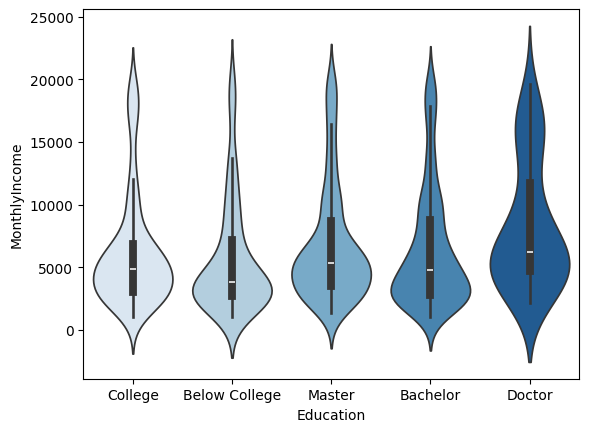

In [641]:
sns.violinplot(data=df2, x="Education", y="MonthlyIncome", palette= 'Blues')

Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'

In [642]:
df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\806631547.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\806631547.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobInvolvement,,
1,6418.108434,5346.0
2,6609.648000,5163.0
3,6521.637097,4815.5
4,6161.159722,4888.0


JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [643]:
df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1954906032.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1954906032.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
PerformanceRating,,
3,6537.274116,4965.5
4,6313.893805,4777.0


PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'

In [644]:
df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2853107831.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2853107831.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
RelationshipSatisfaction,,
1,6177.793478,4745.0
2,6596.983498,4950.0
3,6543.773420,4907.0
4,6601.296296,5027.0


RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [645]:
df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\49404431.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\49404431.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
WorkLifeBalance,,
1,5887.137500,4269.5
2,6461.808140,4970.0
3,6532.232923,4941.0
4,6746.352941,5067.0


WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

In [646]:
df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2391403868.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2391403868.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
NumCompaniesWorked,,
0,5805.238579,4523.0
1,5259.963532,4037.0
2,7688.678082,6384.0
3,8270.547170,6261.0
>3,7243.114094,5410.0


C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1108498131.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_num = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1108498131.py:2: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_num = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([ np.median])


Text(0, 0.5, '')

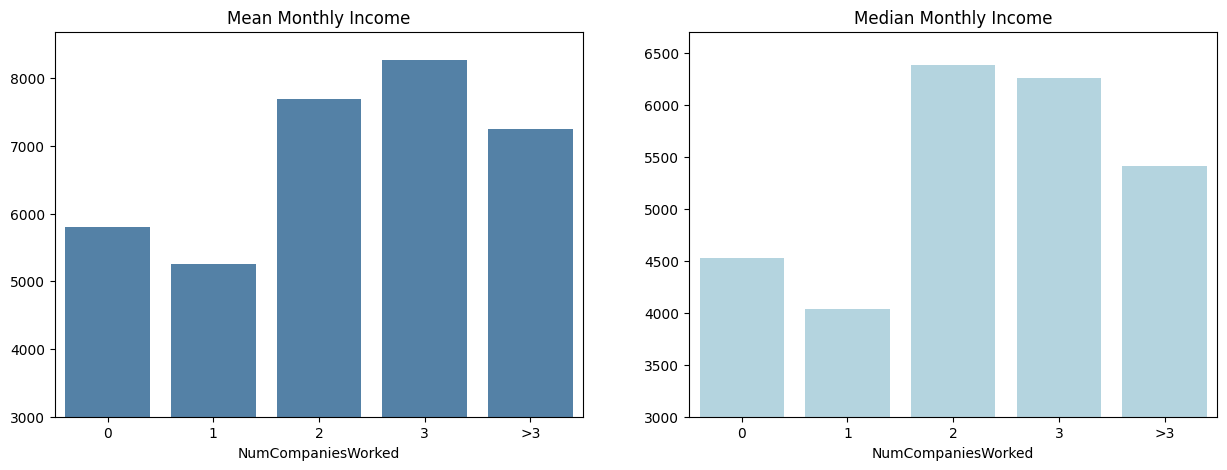

In [647]:
mean_num = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean])
median_num = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([ np.median])

f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

sns.barplot(x='NumCompaniesWorked', y='mean', data=mean_num, color='steelblue', ax=axes[0])
sns.barplot(x='NumCompaniesWorked', y='median', data=median_num, color='lightblue', ax=axes[1])

axes[0].set_ylim(3000, None)  
axes[0].set_title('Mean Monthly Income')
axes[0].set_ylabel('')

axes[1].set_ylim(3000, None)  
axes[1].set_title('Median Monthly Income')
axes[1].set_ylabel('')


C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1847875113.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  am = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1847875113.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  am = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()


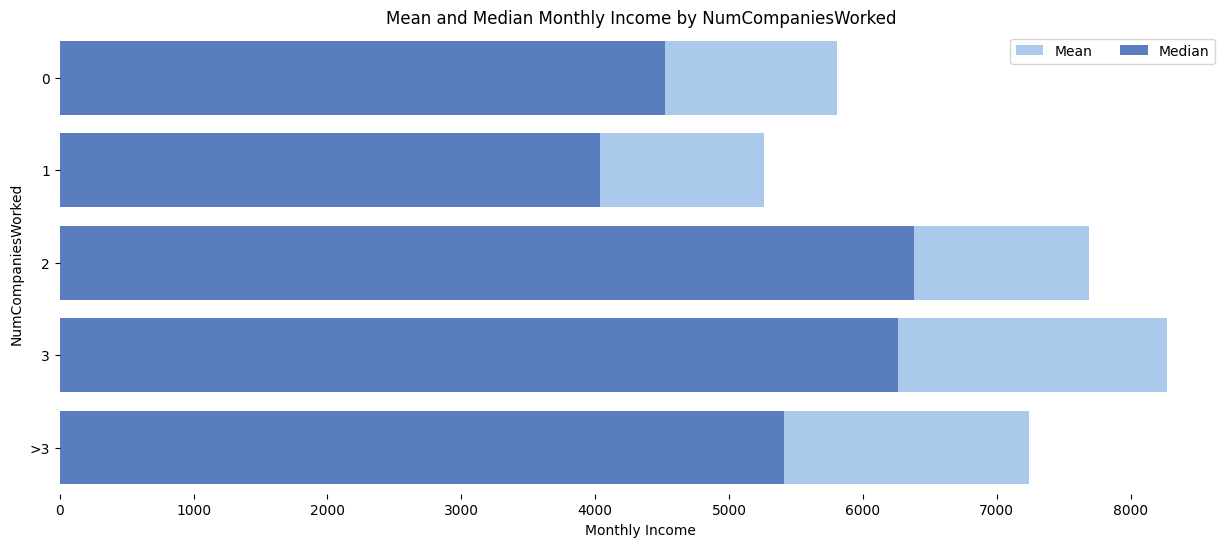

In [648]:
am = df1.groupby('NumCompaniesWorked')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()

f, ax = plt.subplots(figsize=(15, 6))

sns.set_color_codes("pastel")
sns.barplot(x="mean", y="NumCompaniesWorked", data=am,
            label="Mean", color="b", orient='h')

sns.set_color_codes("muted")
sns.barplot(x="median", y="NumCompaniesWorked", data=am,
            label="Median", color="b", orient='h')

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Monthly Income", ylabel="NumCompaniesWorked",
       title="Mean and Median Monthly Income by NumCompaniesWorked")
sns.despine(left=True, bottom=True)

plt.show()

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2207441571.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="NumCompaniesWorked", y="MonthlyIncome", palette="Blues_d")


<Axes: xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

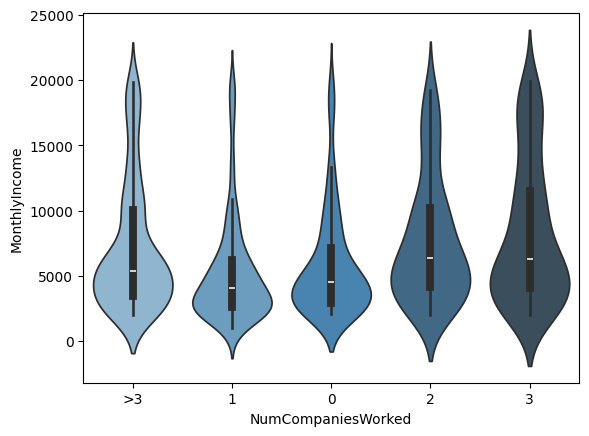

In [649]:
sns.violinplot(data=df2, x="NumCompaniesWorked", y="MonthlyIncome", palette="Blues_d")

#### Variables Numéricas:

- Hay una correlación postiva fuerte (R >0.7) entre la experiencia laboral y el salario mensual
- Hay una correlación postiva débil (0.5< R <0.7) entre los años de trabajo dentro de la compañía y el salario mensual
- Hay una correlación postiva débil (0.5< R <0.7) entre la edad y el salario mensual. Esta relación se puede deber a la correlación entre edad y la experiencia laboral

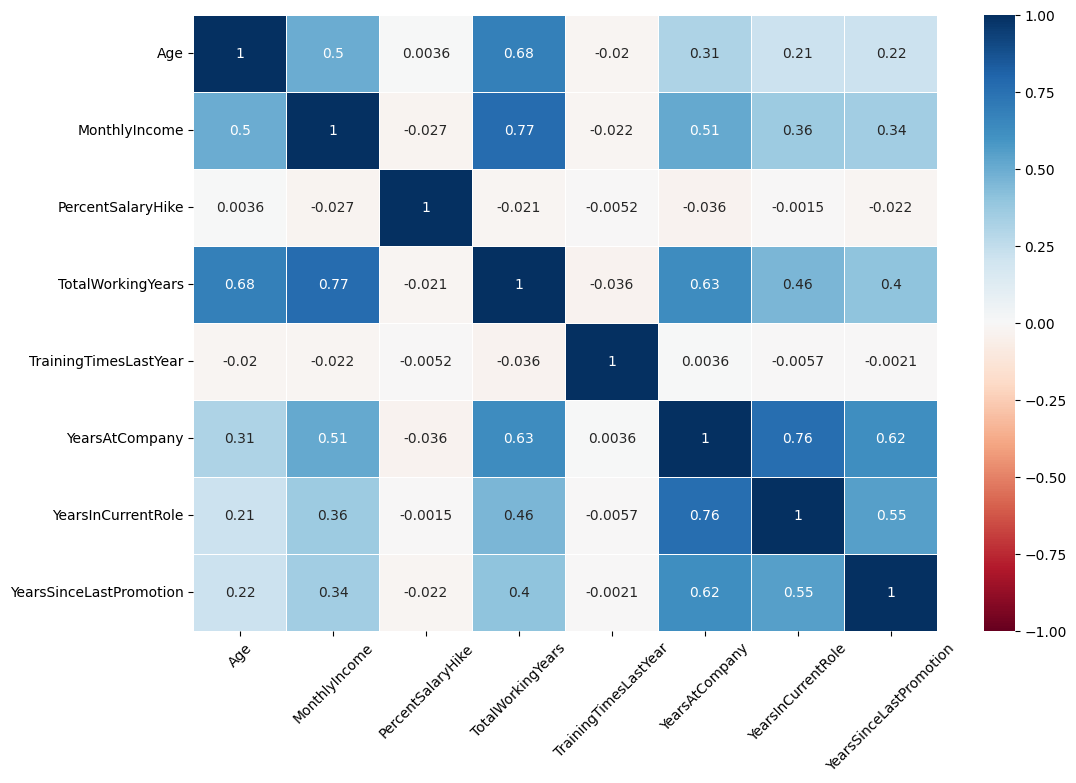

In [650]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(numeric_only=True),vmin=-1, vmax=1, center=0,
            cmap='RdBu',
            linewidths=.5, annot=True);
plt.xticks(rotation = 45);

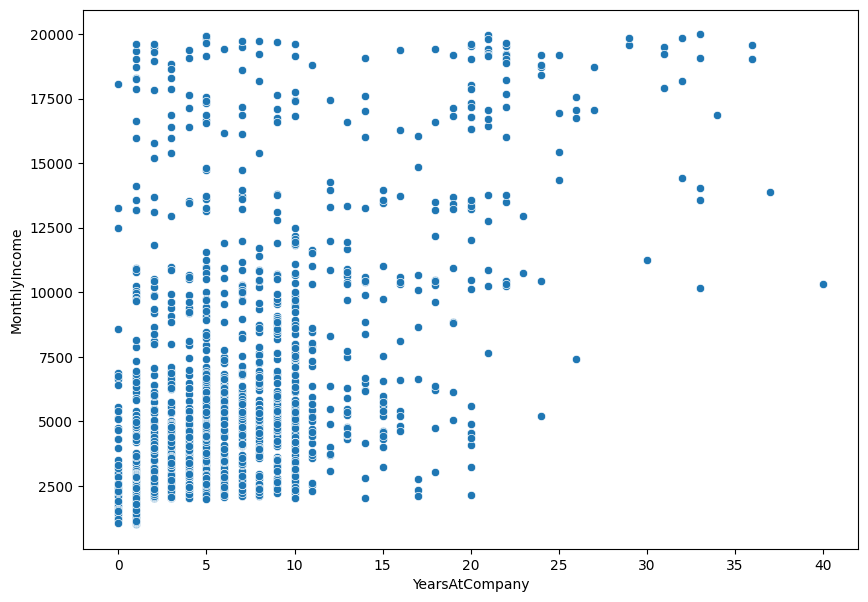

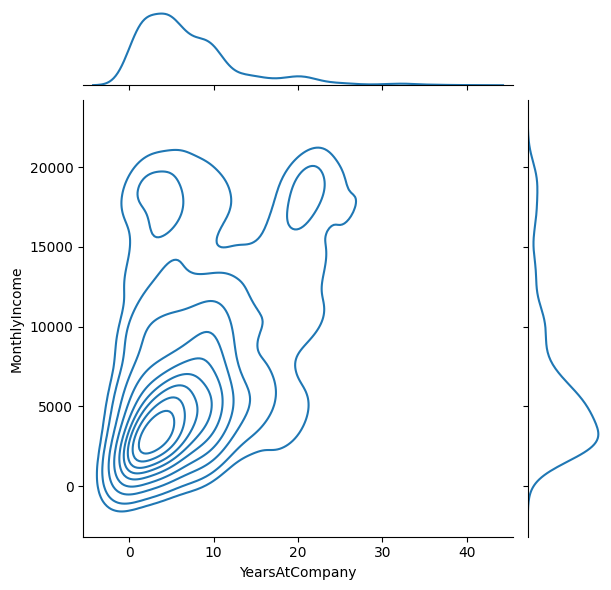

In [651]:
f, axes = plt.subplots(figsize = (10,7), sharex=True)
sns.scatterplot(data=df1, x='YearsAtCompany', y="MonthlyIncome")
sns.jointplot(x=df1['YearsAtCompany'], y=df1['MonthlyIncome'], kind="kde")

### ANÁLISIS MULTIVARIANTE

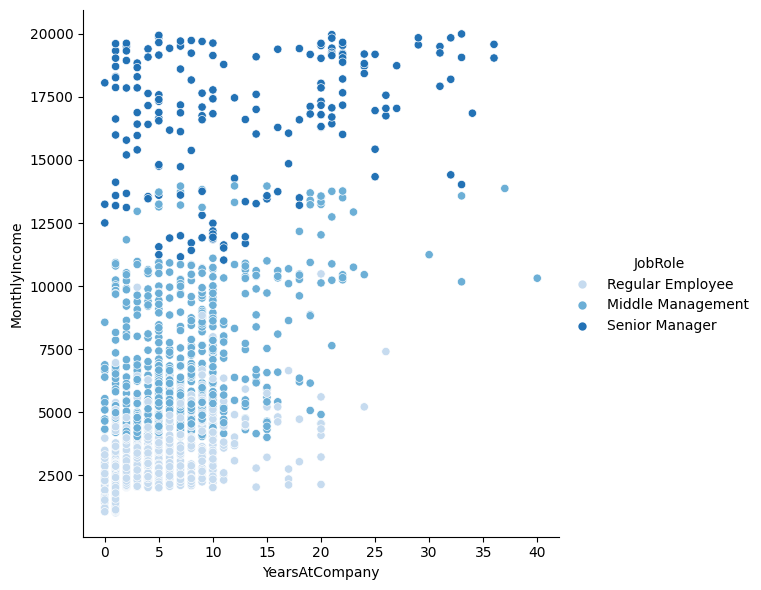

In [652]:
df2['JobRole'] = pd.Categorical(df2['JobRole'], categories=['Regular Employee', 'Middle Management', 'Senior Manager'], ordered=True)


sns.relplot(data=df2,
            x="YearsAtCompany",
            y="MonthlyIncome",
            hue="JobRole",
            sizes=(4, 300),
            alpha=.99, palette="Blues",
            height=6);

### REVISIÓN DE LAS HIPÓTESIS

#### HIPÓTESIS 1: "El nivel de educación, los años de experiencia y el nivel de compromiso influyen positivamente en el salario mensual (existe una relación positiva)"

1.1. Nivel de educación: Sí se observa una relación en el nivel de educación y el salario medio.

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3151272077.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  am5 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3151272077.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  am5 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()


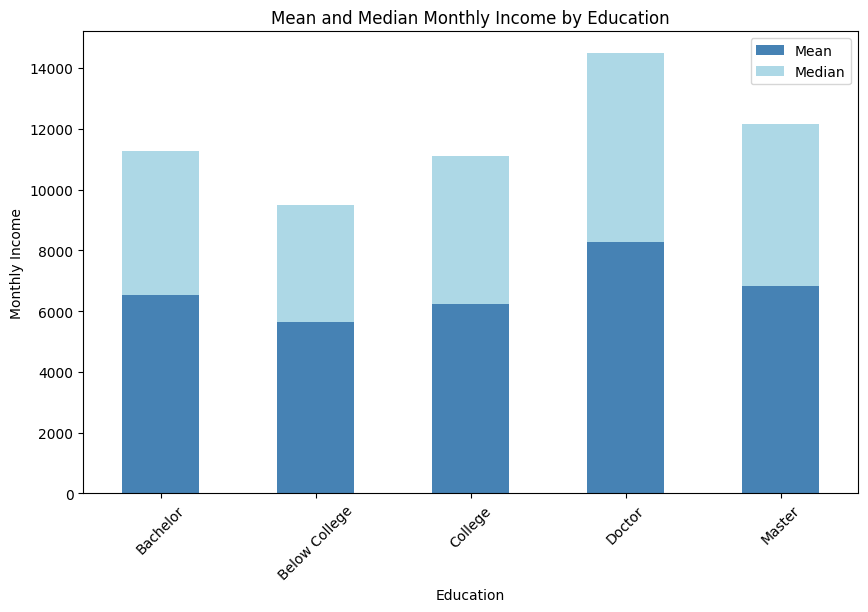

In [653]:
am5 = df2.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()

plt.figure(figsize=(10, 6))

am5.set_index('Education').plot(kind='bar', stacked=True, color=['steelblue', 'lightblue'], ax=plt.gca())

plt.legend(['Mean', 'Median'])
plt.xlabel('Education')
plt.ylabel('Monthly Income')
plt.title('Mean and Median Monthly Income by Education')
plt.xticks(rotation = 45)
plt.show()

1.2. Años de experiencia: Se observa una correlación positiva fuerte (R >0.7) entre la experiencia laboral y el salario mensual. Esta correlación también es positiva (si bien más débil) entre los años de trabajo dentro de la empresa y el salario mensual. Por tanto, puede ser un factor determinante del salario.

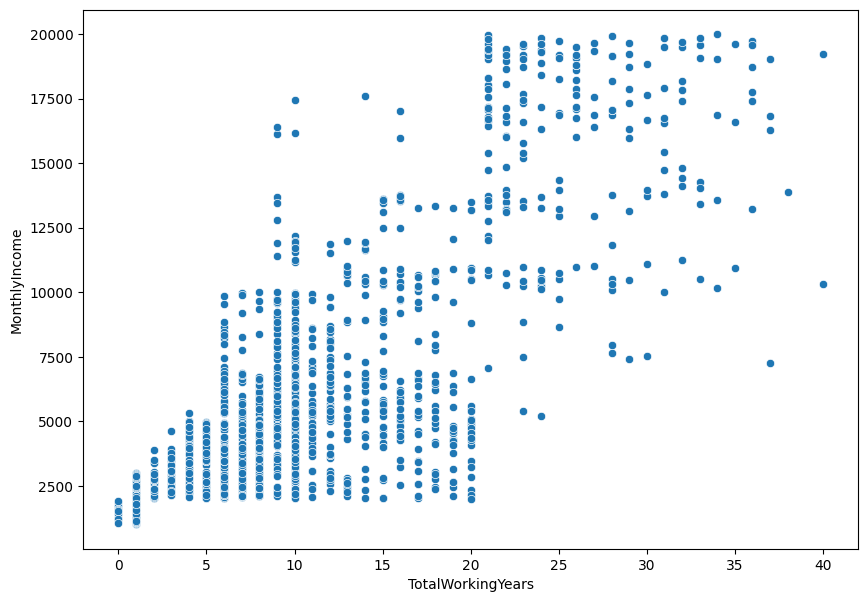

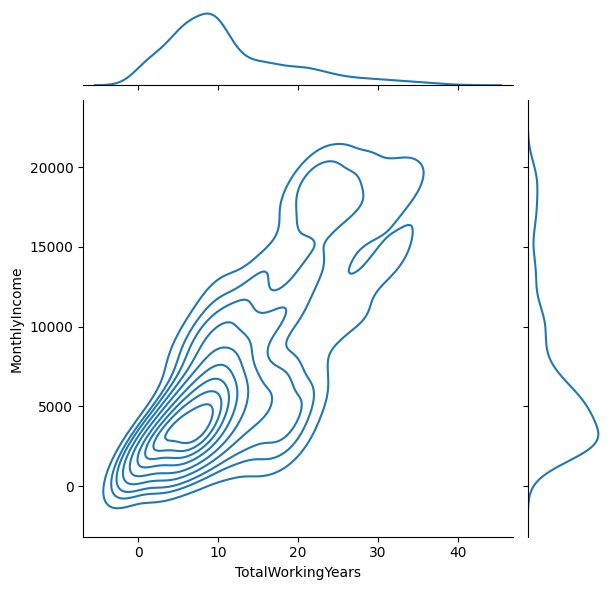

In [654]:
f, axes = plt.subplots(figsize = (10,7), sharex=True)
sns.scatterplot(data=df1, x='TotalWorkingYears', y="MonthlyIncome")
sns.jointplot(x=df1['TotalWorkingYears'], y=df1['MonthlyIncome'], kind="kde")

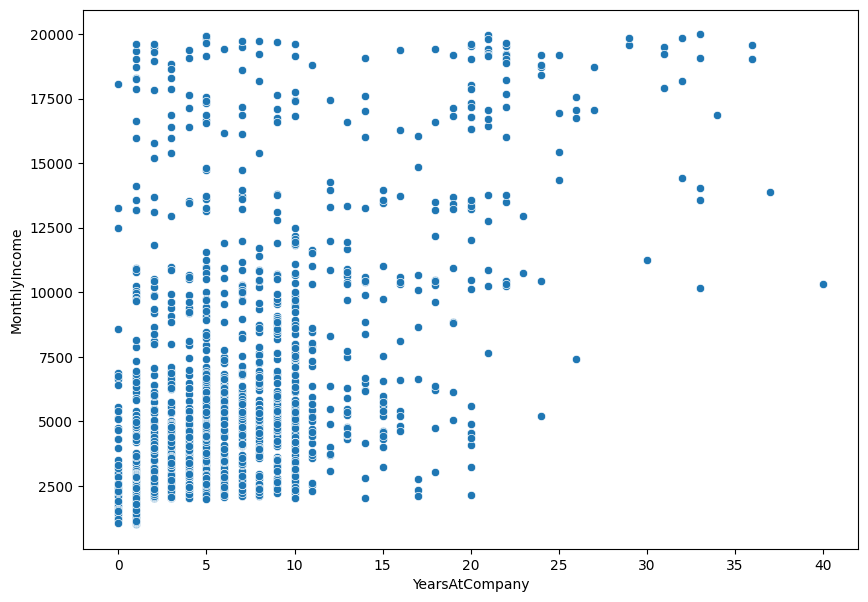

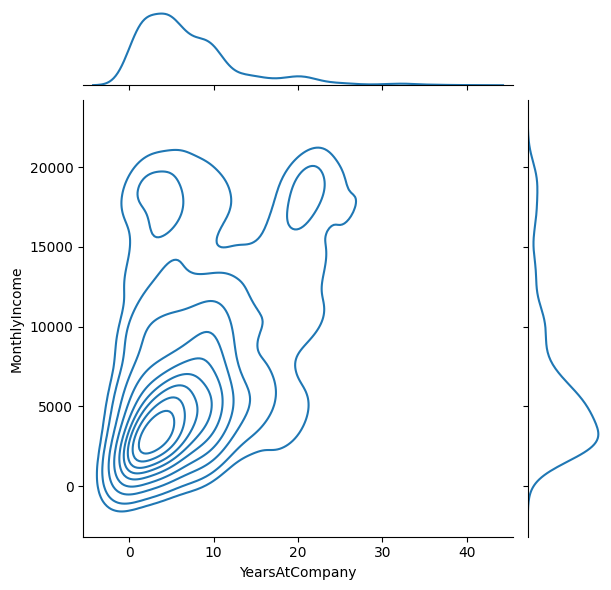

In [655]:
f, axes = plt.subplots(figsize = (10,7), sharex=True)
sns.scatterplot(data=df1, x='YearsAtCompany', y="MonthlyIncome")
sns.jointplot(x=df1['YearsAtCompany'], y=df1['MonthlyIncome'], kind="kde")

Hipótesís 1.C. Grado de compromiso: No se observa ninguna relación entre el grado de compromiso (o el desempeño) y el salario mensual 

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1875304216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df2, x="JobInvolvement", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='JobInvolvement', ylabel='MonthlyIncome'>

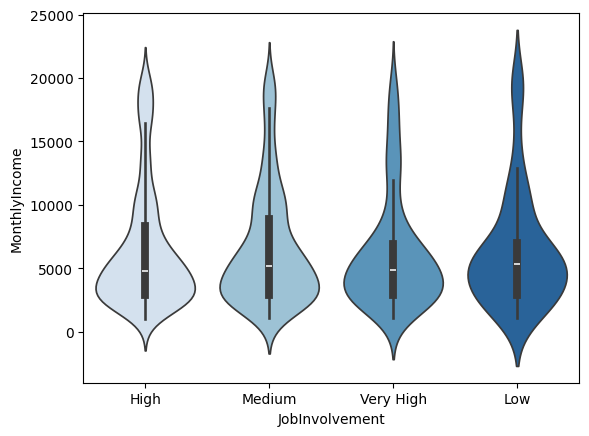

In [656]:

sns.violinplot(data=df2, x="JobInvolvement", y="MonthlyIncome", palette= 'Blues')

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3855486727.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numJI = df2.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3855486727.py:2: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numJI = df2.groupby('JobInvolvement')['MonthlyIncome'].agg([ np.median])


Text(0, 0.5, '')

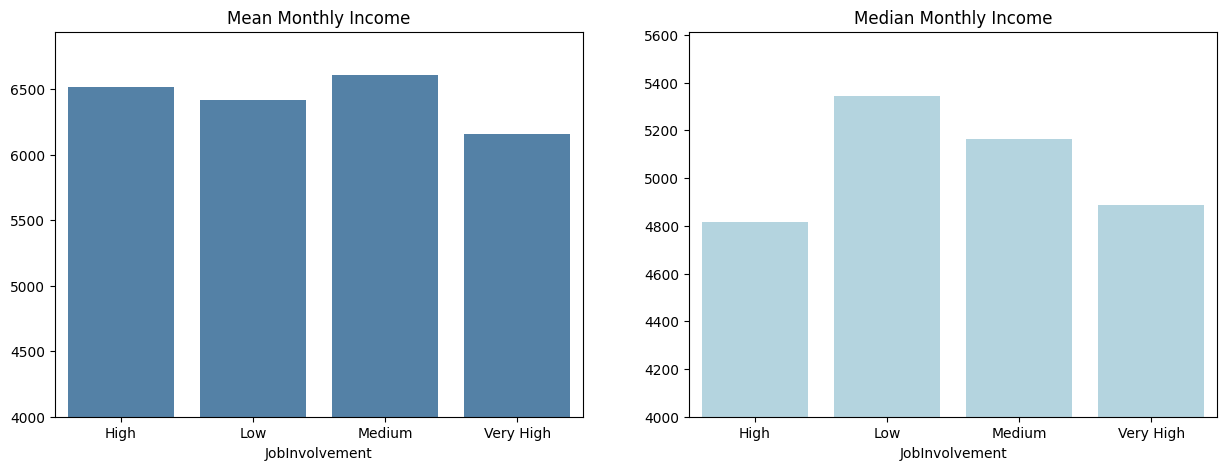

In [657]:
mean_numJI = df2.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean])
median_numJI = df2.groupby('JobInvolvement')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

df2['JobInvolvement'] = pd.Categorical(df2['JobInvolvement'], categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)

sns.barplot(x='JobInvolvement', y='mean', data=mean_numJI, color='steelblue', ax=axes[0])
sns.barplot(x='JobInvolvement', y='median', data=median_numJI, color='lightblue', ax=axes[1])

axes[0].set_ylim(4000, None)  
axes[0].set_title('Mean Monthly Income')
axes[0].set_ylabel('')

axes[1].set_ylim(4000, None)  
axes[1].set_title('Median Monthly Income')
axes[1].set_ylabel('')

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\4061991804.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numPR = df2.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\4061991804.py:2: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numPR = df2.groupby('PerformanceRating')['MonthlyIncome'].agg([ np.median])


Text(0.5, 1.0, 'Median Monthly Income')

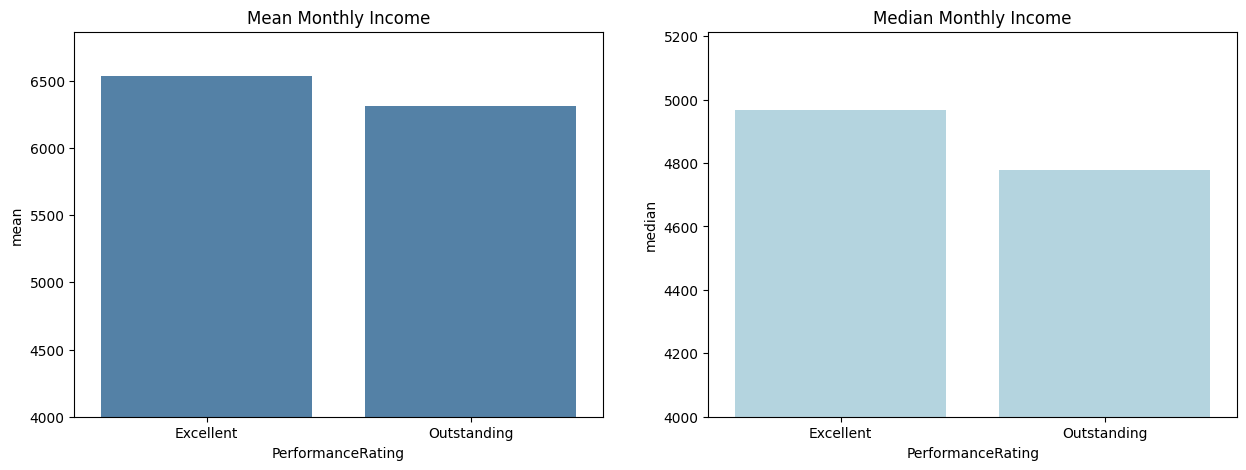

In [658]:
mean_numPR = df2.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean])
median_numPR = df2.groupby('PerformanceRating')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

df2['PerformanceRating'] = pd.Categorical(df2['PerformanceRating'], categories=['Excellent', 'Outstanding'], ordered=True)

sns.barplot(x='PerformanceRating', y='mean', data=mean_numPR, color='steelblue', ax=axes[0])
sns.barplot(x='PerformanceRating', y='median', data=median_numPR, color='lightblue', ax=axes[1])

axes[0].set_ylim(4000, None)  
axes[0].set_title('Mean Monthly Income')

axes[1].set_ylim(4000, None)  
axes[1].set_title('Median Monthly Income')

#### HIPÓTESIS 2: "Área de especialización- El departamento en el que el empleado trabaja dentro de la empresa y su área de estudios influye en su salario mensual"

2.1. Departamento: En un principio, parece haber una relación entre el departamento en el que trabaja cada empleado y su salario. El salario mediano de los trabajadores de ventas e investigación es superior al de los empleados de RRHH. Sin embargo, si se analiza detenidamente, se observa que la diferencia se explica porque no existen puestos de gerencia intermedios en RRHH. Esta circuntancia hace que el salario mediano de los empleados de RRHH sea comparativamente inferior, sin que ello se deba a una valoración mayor o menor de su trabajo por parte de la empresa.

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2070043355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="Department", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='Department', ylabel='MonthlyIncome'>

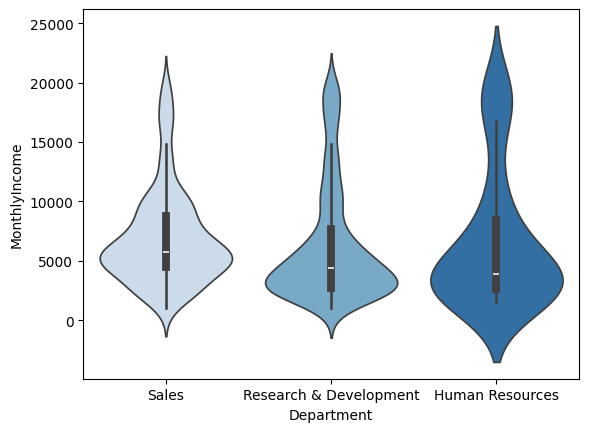

In [659]:
sns.violinplot(data=df1, x="Department", y="MonthlyIncome", palette= 'Blues')

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3455163466.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numDep = df2.groupby('Department')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3455163466.py:2: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numDep = df2.groupby('Department')['MonthlyIncome'].agg([ np.median])


Text(0, 0.5, '')

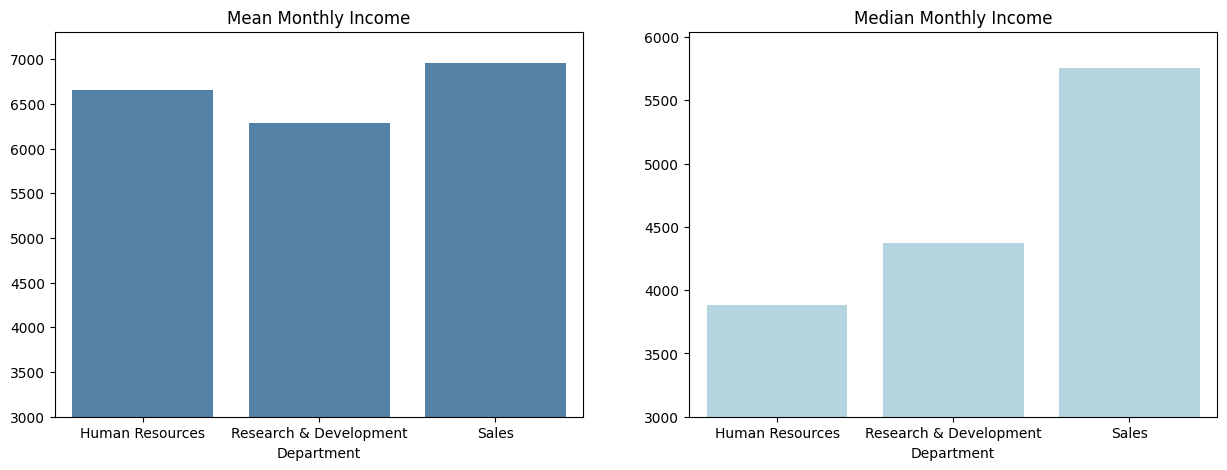

In [660]:
mean_numDep = df2.groupby('Department')['MonthlyIncome'].agg([np.mean])
median_numDep = df2.groupby('Department')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

sns.barplot(x='Department', y='mean', data=mean_numDep, color='steelblue', ax=axes[0])
sns.barplot(x='Department', y='median', data=median_numDep, color='lightblue', ax=axes[1])

axes[0].set_ylim(3000, None)  
axes[0].set_title('Mean Monthly Income')
axes[0].set_ylabel('')

axes[1].set_ylim(3000, None)  
axes[1].set_title('Median Monthly Income')
axes[1].set_ylabel('')

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2708899480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_numDep = df2.groupby(['Department', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2708899480.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numDep = df2.groupby(['Department', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()


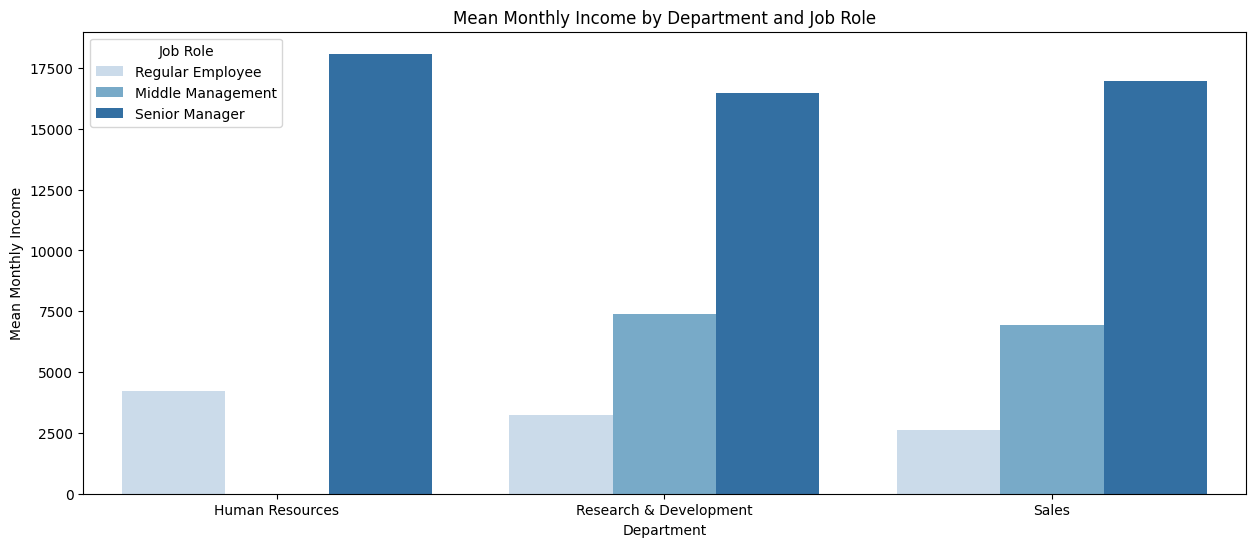

In [661]:
mean_numDep = df2.groupby(['Department', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()

plt.figure(figsize=(15, 6))

sns.barplot(x='Department', y='mean', hue='JobRole', data=mean_numDep, palette='Blues')

plt.xlabel("Department")
plt.ylabel("Mean Monthly Income")
plt.title("Mean Monthly Income by Department and Job Role")
plt.legend(title="Job Role")

plt.show()

2.2. Área de estudios: El salario mediano de los trabajadores que estudiaron RRHH es el más bajo. De nuevo, esto se debe a la falta de puesto de gerencia intermedia en este departamento. Por su parte, el área de estudios con el salario mediano más alto es márketing. En este sentido, podría haber una diferencia en el salario en función del área de estudios.

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2114779940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x="EducationField", y="MonthlyIncome", palette= 'Blues')


<Axes: xlabel='EducationField', ylabel='MonthlyIncome'>

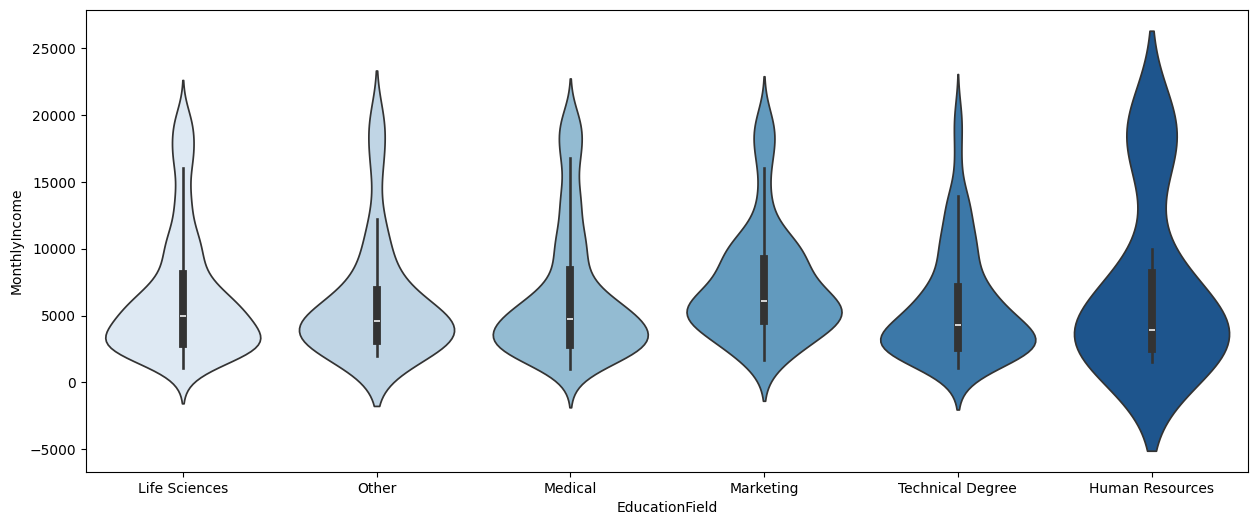

In [662]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df1, x="EducationField", y="MonthlyIncome", palette= 'Blues')

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\361647749.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numEF = df2.groupby('EducationField')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\361647749.py:2: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numEF = df2.groupby('EducationField')['MonthlyIncome'].agg([ np.median])


Text(0, 0.5, '')

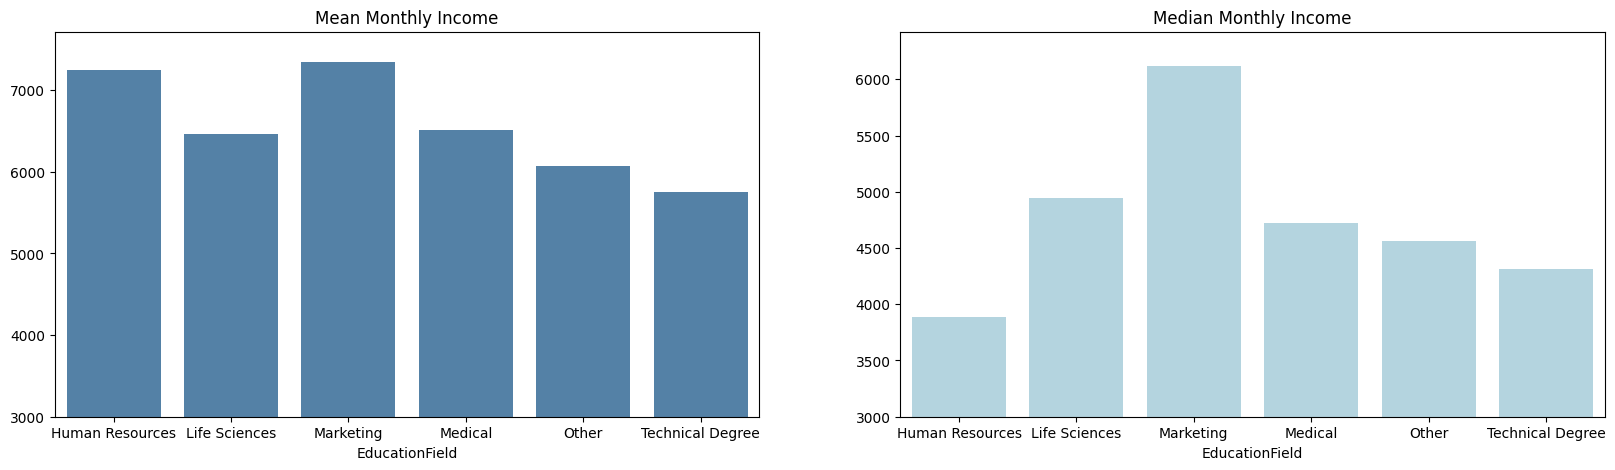

In [663]:
mean_numEF = df2.groupby('EducationField')['MonthlyIncome'].agg([np.mean])
median_numEF = df2.groupby('EducationField')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(20,5), sharex=True)

sns.barplot(x='EducationField', y='mean', data=mean_numEF, color='steelblue', ax=axes[0])
sns.barplot(x='EducationField', y='median', data=median_numEF, color='lightblue', ax=axes[1])

axes[0].set_ylim(3000, None)  
axes[0].set_title('Mean Monthly Income')
axes[0].set_ylabel('')

axes[1].set_ylim(3000, None)  
axes[1].set_title('Median Monthly Income')
axes[1].set_ylabel('')

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3196289988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_numEF = df2.groupby(['EducationField', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3196289988.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numEF = df2.groupby(['EducationField', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()


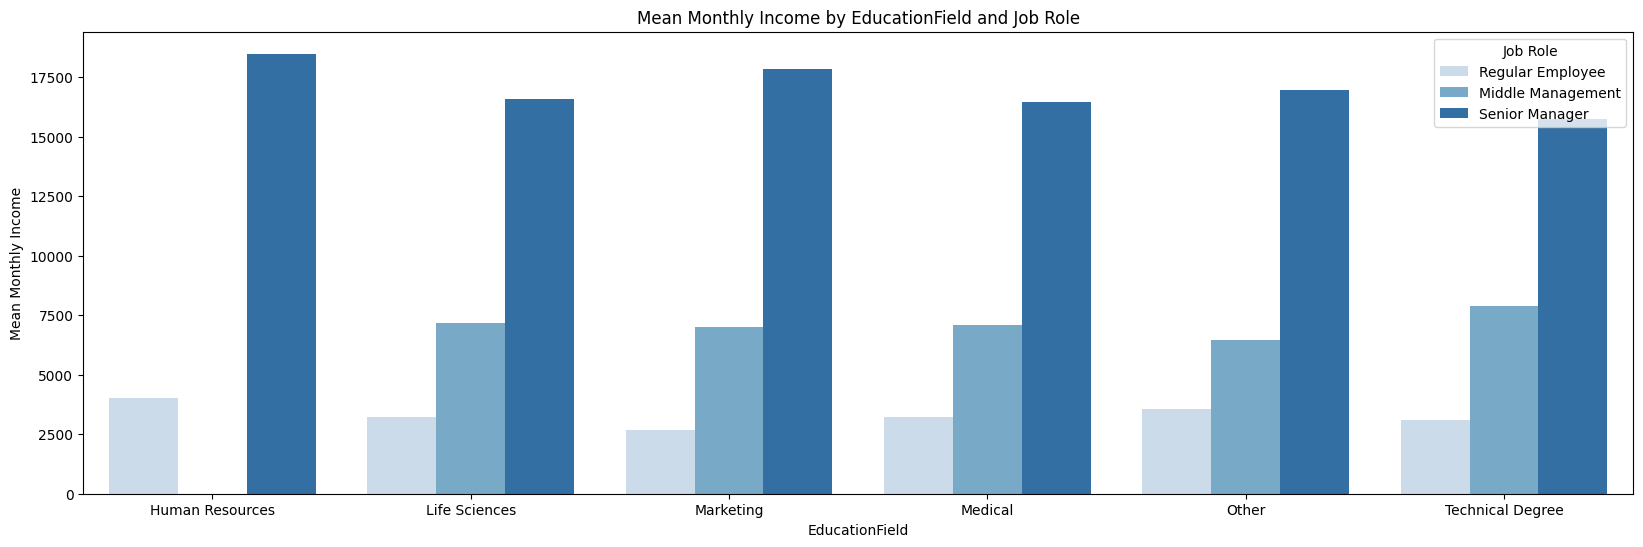

In [664]:
mean_numEF = df2.groupby(['EducationField', 'JobRole'])['MonthlyIncome'].agg([np.mean]).reset_index()

# Crear la figura y los ejes
plt.figure(figsize=(20, 6))

# Crear el barplot con hue para JobRole
sns.barplot(x='EducationField', y='mean', hue='JobRole', data=mean_numEF, palette='Blues')

# Añadir las etiquetas informativas del eje y el título
plt.xlabel("EducationField")
plt.ylabel("Mean Monthly Income")
plt.title("Mean Monthly Income by EducationField and Job Role")
plt.legend(title="Job Role")

# Mostrar el gráfico
plt.show()

#### **Hipótesis 3**: "La vida personal puede tener un impacto en el salario- El grado de satisfacción dentro de una relación sentimental, el estado matrimonial y la percepción del equilibrio entre la vida personal y laboral puede influir en el salario mensual"

3.1. Satisfacción con las relaciones personales: Se observa una ligera diferencia en el salario medio y mediano entre los trabajadores con una sastisfacción baja con sus relaciones personales y el resto. Podría ser un factor que afecte al salario.

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3174024698.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numRS = df2.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3174024698.py:2: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_numRS = df2.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([ np.median])


Text(0, 0.5, '')

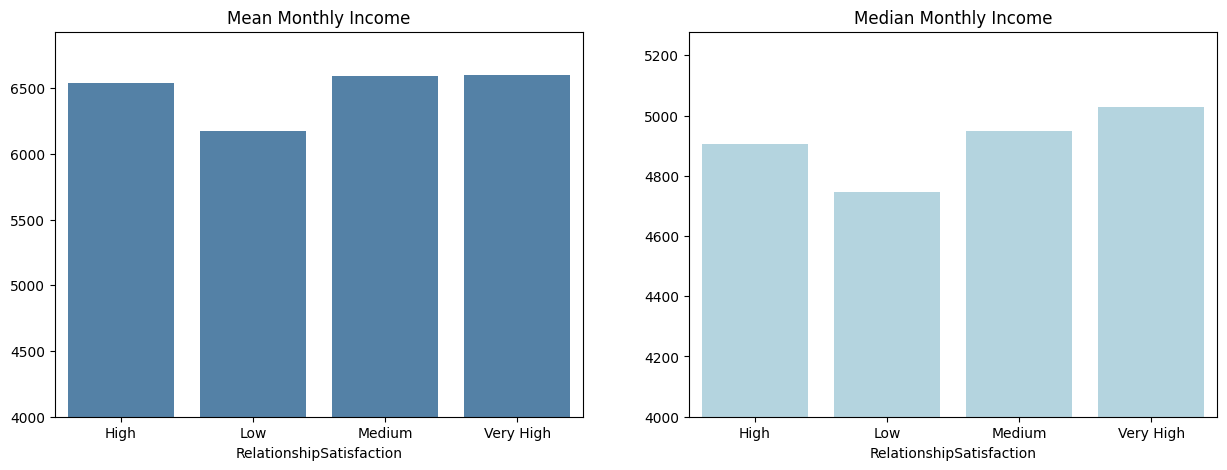

In [665]:
mean_numRS = df2.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean])
median_numRS = df2.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([ np.median])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

df2['RelationshipSatisfaction'] = pd.Categorical(df2['RelationshipSatisfaction'], categories=['Low', 'Medium', 'High', 'Very High'], ordered=True)

sns.barplot(x='RelationshipSatisfaction', y='mean', data=mean_numRS, color='steelblue', ax=axes[0])
sns.barplot(x='RelationshipSatisfaction', y='median', data=median_numRS, color='lightblue', ax=axes[1])

axes[0].set_ylim(4000, None)  
axes[0].set_title('Mean Monthly Income')
axes[0].set_ylabel('')

axes[1].set_ylim(4000, None)  
axes[1].set_title('Median Monthly Income')
axes[1].set_ylabel('')

3.2 Estado Matrimonial: Se observa una ligera diferencia en el salario medio y mediano de los trabajadores solteros y el resto. No obstante, al analizarlo más detenidamente, se observa que esta relación se debe a que los empleados solteros son, de media, más jovenes que el resto y por tanto cuentan con una menor experiencia laboral. 

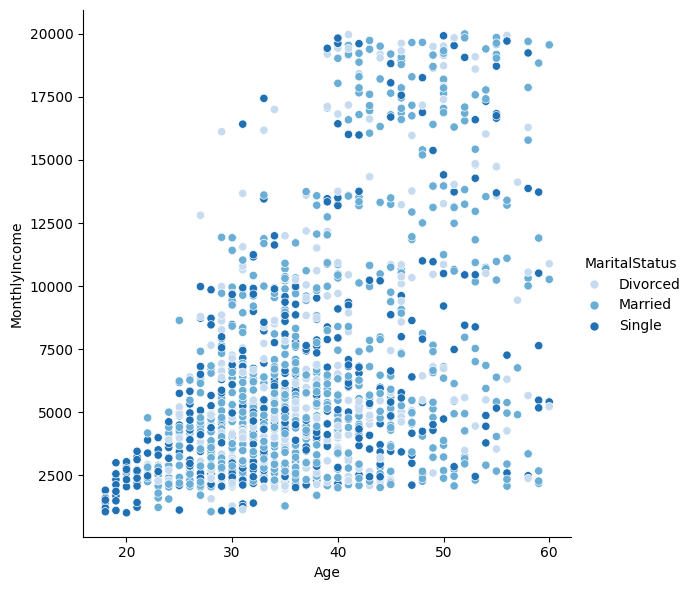

In [666]:
df2['MaritalStatus'] = pd.Categorical(df2['MaritalStatus'], categories=['Divorced', 'Married', 'Single'], ordered=True)


sns.relplot(data=df2,
            x="Age",
            y="MonthlyIncome",
            hue="MaritalStatus",
            sizes=(4, 300),
            alpha=1, palette='Blues',
            height=6);

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1452716175.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_numMS = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1452716175.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_numMS = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1452716175.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior

Text(0, 0.5, '')

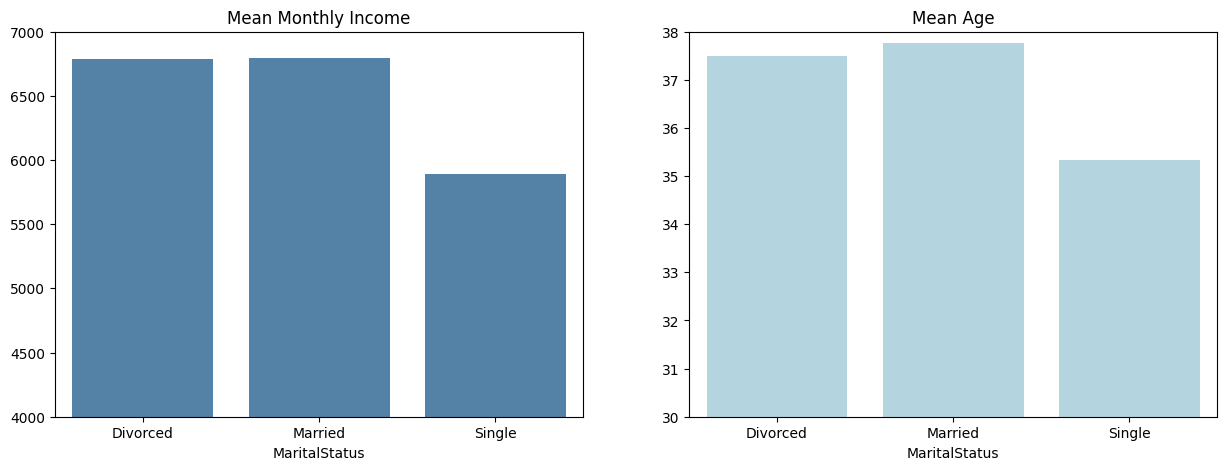

In [667]:
mean_numMS = df2.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean])
mean_numMSA = df2.groupby('MaritalStatus')['Age'].agg([np.mean])


f, axes = plt.subplots(1, 2, figsize=(15,5), sharex=True)

df2['MaritalStatus'] = pd.Categorical(df2['MaritalStatus'], categories=['Single', 'Married', 'Divorced'], ordered=True)

sns.barplot(x='MaritalStatus', y='mean', data=mean_numMS, color='steelblue', ax=axes[0])
sns.barplot(x='MaritalStatus', y='mean', data=mean_numMSA, color='lightblue', ax=axes[1])

axes[0].set_ylim(4000, 7000)  
axes[0].set_title('Mean Monthly Income')
axes[0].set_ylabel('')

axes[1].set_ylim(30, 38)  
axes[1].set_title('Mean Age')
axes[1].set_ylabel('')

3.3. Equilibrio entre la vida personal y profesional: Se observa una ligera diferencia en el salario medio y mediano entre los trabajadores insatisfechos con su equilibrio entre la vida personal y laboral y el resto. Es posible que una mala percepción de este equilibrio haya afectado a su motivación.

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3354379229.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  am2 = df2.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\3354379229.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  am2 = df2.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()


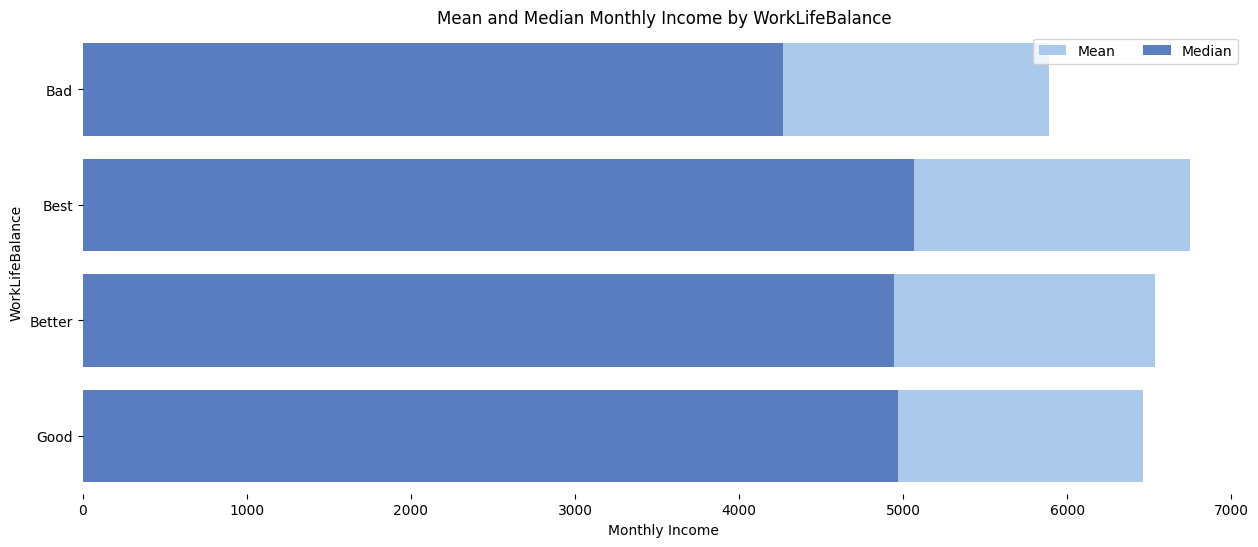

In [668]:
am2 = df2.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()

f, ax = plt.subplots(figsize=(15, 6))

sns.set_color_codes("pastel")
sns.barplot(x="mean", y="WorkLifeBalance", data=am2,
            label="Mean", color="b", orient='h')

sns.set_color_codes("muted")
sns.barplot(x="median", y="WorkLifeBalance", data=am2,
            label="Median", color="b", orient='h')

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Monthly Income", ylabel="WorkLifeBalance",
       title="Mean and Median Monthly Income by WorkLifeBalance")
sns.despine(left=True, bottom=True)

plt.show()

#### **Hipótesis 4**- Factores externos: Factores incontrolables como el genero y la edad pueden tener un impacto en el salario

4.1. Sexo: No parece haber una relación clara entre el sexo y el salario.

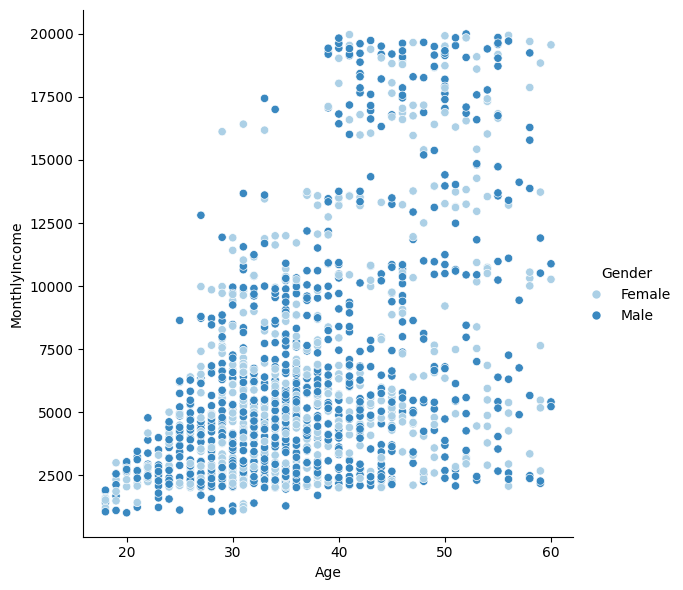

In [669]:
sns.relplot(data=df2,
            x="Age",
            y="MonthlyIncome",
            hue="Gender",
            sizes=(4, 300),
            alpha=.99, palette="Blues",
            height=6);

In [670]:
df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1116162445.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\1116162445.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Gender,,
Female,6686.566327,5081.5
Male,6380.507937,4837.5


C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2413172640.py:1: FutureWarning: The provided callable <function mean at 0x0000014A476A9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_data20 = df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()
C:\Users\rafam\AppData\Local\Temp\ipykernel_40576\2413172640.py:1: FutureWarning: The provided callable <function median at 0x0000014A477C0040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  agg_data20 = df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()


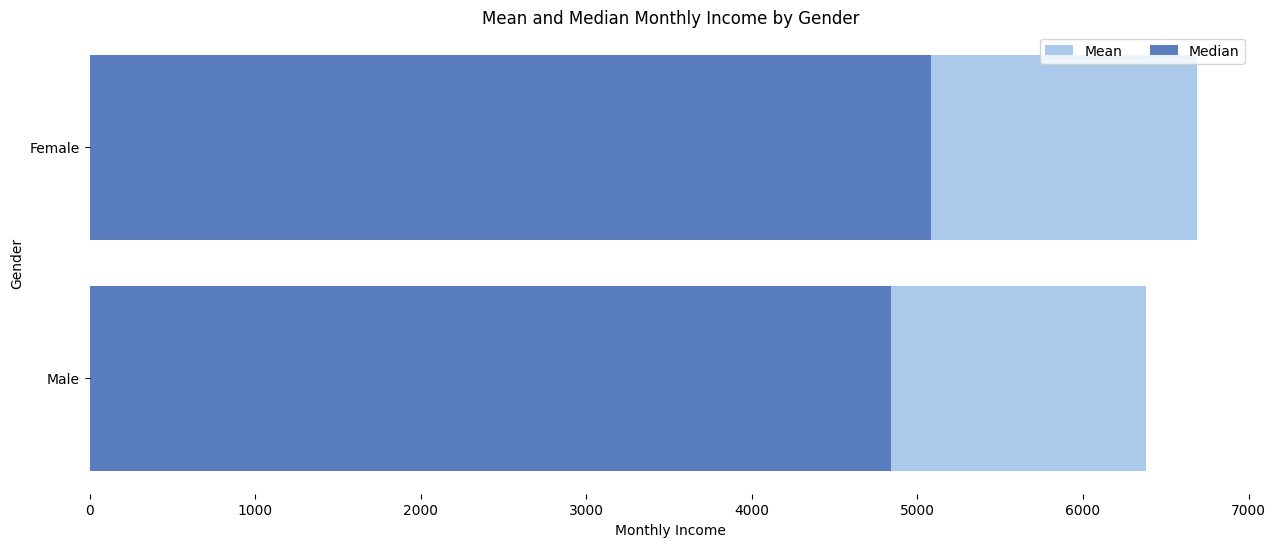

In [671]:
agg_data20 = df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median]).reset_index()

f, ax = plt.subplots(figsize=(15, 6))

sns.set_color_codes("pastel")
sns.barplot(x="mean", y="Gender", data=agg_data20,
            label="Mean", color="b", orient='h')

sns.set_color_codes("muted")
sns.barplot(x="median", y="Gender", data=agg_data20,
            label="Median", color="b", orient='h')

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Monthly Income", ylabel="Gender",
       title="Mean and Median Monthly Income by Gender")
sns.despine(left=True, bottom=True)

plt.show()

4.2. Edad: Parece haber una relación entre la edad y el salario- existe una correlación positiva débil (R=0.5). Sin embargo, es posible que esta relación se explique por la correlación entre la edad y la experiencia laboral.

<Figure size 1000x700 with 0 Axes>

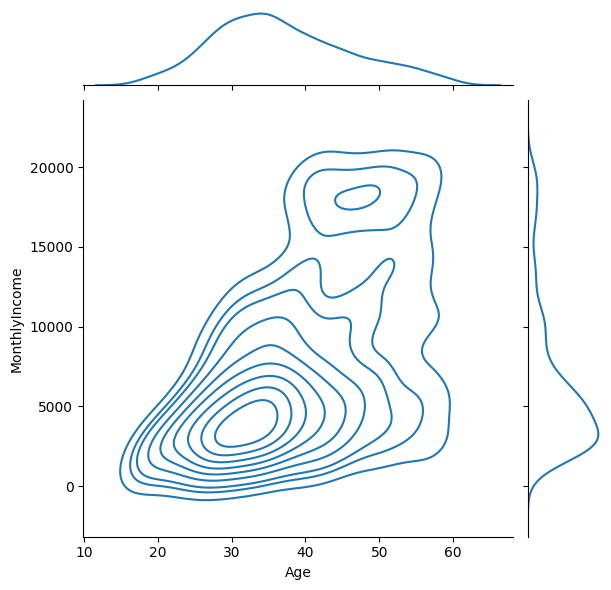

In [672]:
plt.figure(figsize = (10,7))
sns.jointplot(x=df1['Age'], y=df1['MonthlyIncome'], kind="kde")

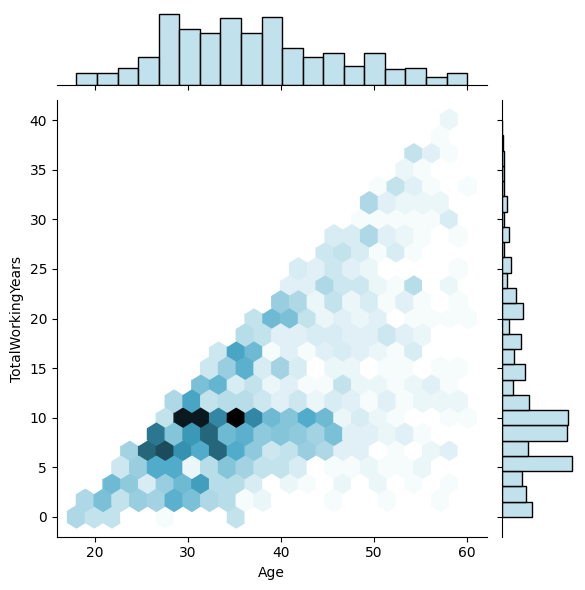

In [673]:
sns.jointplot(x=df1['Age'],
              y=df1['TotalWorkingYears'],
              kind="hex",
              color="lightblue")

### CONCLUSIONES:

- Tras comprobar las hipótesis, parece que se cumplen las planteadas en los apartados 1 y 2 de la hipótesis 1, y en los apartados 1 y 3 de la hipótesis 3. Es decir, se observa una relación positiva entre el nivel de estudios y la experiencia laboral y el salario mensual, así como entre otros factores menos obvios como la satisfacción con las relaciones personales y la percepción del equilibrio entre la vida personal y profesional y la variable ojetivo.
- Para el resto de las variables estudiadas, no parece haber indicios de una relación con el salario mensual.
- En cualquier caso, para establecer relaciones de causa-efecto entre las variables estudiadas y la variable dependiente, cabría ampliar el análisis a un estudio de inferencia causal.
